# Weather prediction dataset - regression task

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
path_root = os.path.dirname(os.getcwd())
path_data = os.path.join(path_root, "data_weather_prediction")
filename_data = os.path.join(path_data, "weather_prediction_dataset.csv")

In [3]:
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
data.iloc[:5,:5]

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure
0,20000101,1,8,0.89,1.0286
1,20000102,1,8,0.87,1.0318
2,20000103,1,5,0.81,1.0314
3,20000104,1,7,0.79,1.0262
4,20000105,1,5,0.90,1.0246


In [5]:
list({x.split("_")[0] for x in data.columns if x not in ["MONTH", "DATE"]})

['MUENCHEN',
 'MALMO',
 'STOCKHOLM',
 'DUSSELDORF',
 'BASEL',
 'HEATHROW',
 'TOURS',
 'MONTELIMAR',
 'MAASTRICHT',
 'OSLO',
 'LJUBLJANA',
 'PERPIGNAN',
 'ROMA',
 'SONNBLICK',
 'BUDAPEST',
 'DE',
 'KASSEL',
 'DRESDEN']

# Split data into data (X) and labels (y)

In [6]:
columns_selected = [x for x in data.columns if not x.startswith("DUSSELDORF") if x not in ["DATE", "MONTH"]]

X_data = data.loc[:365*3][columns_selected]
X_data.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,6,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,8,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,5,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [7]:
X_data_removed = data.loc[:365*3][[x for x in data.columns if x.startswith("DUSSELDORF")]]
X_data_removed.head()

,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,8,2.5,5.9,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9
1,6,3.0,7.4,0.87,1.0283,0.19,0.00,0.7,6.5,2.7,7.9
2,7,5.5,14.3,0.78,1.0235,0.12,0.28,0.0,7.7,6.9,9.1
3,7,6.0,16.8,0.87,1.0162,0.12,0.97,0.0,7.8,6.6,9.2
4,4,4.5,11.2,0.80,1.0203,0.51,0.00,6.5,5.2,0.4,8.6


In [8]:
#y_data = X_data_removed["DUSSELDORF_precipitation"].values
y_data = data.loc[:365*3]["DUSSELDORF_sunshine"].values
y_data

array([0. , 0.7, 0. , ..., 0. , 0. , 0. ])

<AxesSubplot:>

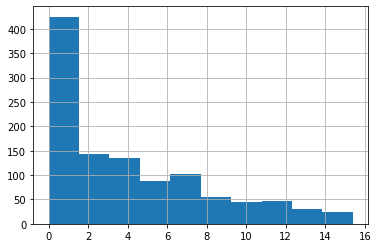

In [9]:
X_data_removed["DUSSELDORF_sunshine"].hist()

# Even more difficult (more biased data) is: precipitation

<AxesSubplot:>

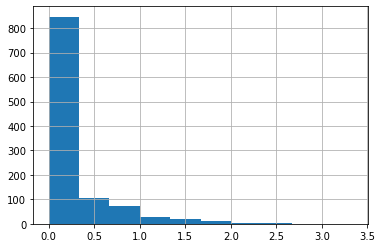

In [10]:
X_data_removed["DUSSELDORF_precipitation"].hist()

# Split data into training, validation, and test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (767), validation (164) and test set (165).


In [12]:
# this also shuffled the data!
y_train[:10]

array([ 2.9,  3.5,  0. , 10.7,  0. ,  1.7,  6.2,  7.6,  0.7,  1.8])

In [14]:
y_train.max(), y_train.min()

(15.4, 0.0)

# Build neural network

In [15]:
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [16]:
X_train.shape, y_train.shape

((767, 152), (767,))

In [38]:
def create_nn(n_features, n_predictions):
    # Input layer
    input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = Dense(100, 'relu')(input)
    layers_dense = Dense(50, 'relu')(layers_dense)

    # Output layer
    output = Dense(n_predictions)(layers_dense)

    return Model(inputs=input, outputs=output, name="weather_prediction_model")

n_features = X_data.shape[1]
n_predictions = 1
model = create_nn(n_features, n_predictions)
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 152)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15300     
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 20,401
Trainable params: 20,401
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='mse', optimizer=Adam(), metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=200,
                    verbose=2)

Epoch 1/200
77/77 - 1s - loss: 7.3947 - mae: 2.1079 - root_mean_squared_error: 2.7193
Epoch 2/200
77/77 - 0s - loss: 3.8456 - mae: 1.5552 - root_mean_squared_error: 1.9610
Epoch 3/200
77/77 - 0s - loss: 2.7834 - mae: 1.3066 - root_mean_squared_error: 1.6684
Epoch 4/200
77/77 - 0s - loss: 2.3845 - mae: 1.2059 - root_mean_squared_error: 1.5442
Epoch 5/200
77/77 - 0s - loss: 2.3246 - mae: 1.1635 - root_mean_squared_error: 1.5247
Epoch 6/200
77/77 - 0s - loss: 2.3019 - mae: 1.1755 - root_mean_squared_error: 1.5172
Epoch 7/200
77/77 - 0s - loss: 2.2430 - mae: 1.1554 - root_mean_squared_error: 1.4977
Epoch 8/200
77/77 - 0s - loss: 2.0980 - mae: 1.1096 - root_mean_squared_error: 1.4484
Epoch 9/200
77/77 - 0s - loss: 1.9227 - mae: 1.0712 - root_mean_squared_error: 1.3866
Epoch 10/200
77/77 - 0s - loss: 2.1013 - mae: 1.0913 - root_mean_squared_error: 1.4496
Epoch 11/200
77/77 - 0s - loss: 1.8367 - mae: 1.0565 - root_mean_squared_error: 1.3553
Epoch 12/200
77/77 - 0s - loss: 1.9512 - mae: 1.0749

Epoch 96/200
77/77 - 0s - loss: 0.5771 - mae: 0.5687 - root_mean_squared_error: 0.7597
Epoch 97/200
77/77 - 0s - loss: 0.5373 - mae: 0.5486 - root_mean_squared_error: 0.7330
Epoch 98/200
77/77 - 0s - loss: 0.5423 - mae: 0.5645 - root_mean_squared_error: 0.7364
Epoch 99/200
77/77 - 0s - loss: 0.5126 - mae: 0.5454 - root_mean_squared_error: 0.7159
Epoch 100/200
77/77 - 0s - loss: 0.4883 - mae: 0.5273 - root_mean_squared_error: 0.6988
Epoch 101/200
77/77 - 0s - loss: 0.4249 - mae: 0.4922 - root_mean_squared_error: 0.6518
Epoch 102/200
77/77 - 0s - loss: 0.3308 - mae: 0.4390 - root_mean_squared_error: 0.5751
Epoch 103/200
77/77 - 0s - loss: 0.2886 - mae: 0.4055 - root_mean_squared_error: 0.5372
Epoch 104/200
77/77 - 0s - loss: 0.3559 - mae: 0.4501 - root_mean_squared_error: 0.5966
Epoch 105/200
77/77 - 0s - loss: 0.4655 - mae: 0.5110 - root_mean_squared_error: 0.6823
Epoch 106/200
77/77 - 0s - loss: 0.3040 - mae: 0.4190 - root_mean_squared_error: 0.5514
Epoch 107/200
77/77 - 0s - loss: 0.3

77/77 - 0s - loss: 0.1599 - mae: 0.3108 - root_mean_squared_error: 0.3998
Epoch 190/200
77/77 - 0s - loss: 0.2062 - mae: 0.3469 - root_mean_squared_error: 0.4540
Epoch 191/200
77/77 - 0s - loss: 0.1116 - mae: 0.2575 - root_mean_squared_error: 0.3341
Epoch 192/200
77/77 - 0s - loss: 0.1063 - mae: 0.2533 - root_mean_squared_error: 0.3260
Epoch 193/200
77/77 - 0s - loss: 0.1657 - mae: 0.3112 - root_mean_squared_error: 0.4071
Epoch 194/200
77/77 - 0s - loss: 0.1452 - mae: 0.2903 - root_mean_squared_error: 0.3811
Epoch 195/200
77/77 - 0s - loss: 0.2091 - mae: 0.3489 - root_mean_squared_error: 0.4573
Epoch 196/200
77/77 - 0s - loss: 0.2911 - mae: 0.4208 - root_mean_squared_error: 0.5395
Epoch 197/200
77/77 - 0s - loss: 0.2176 - mae: 0.3493 - root_mean_squared_error: 0.4665
Epoch 198/200
77/77 - 0s - loss: 0.3209 - mae: 0.4283 - root_mean_squared_error: 0.5664
Epoch 199/200
77/77 - 0s - loss: 0.2783 - mae: 0.4029 - root_mean_squared_error: 0.5276
Epoch 200/200
77/77 - 0s - loss: 0.2371 - mae:

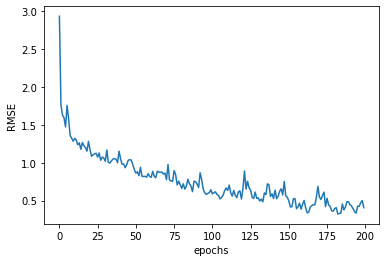

In [36]:
import seaborn as sns

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df['root_mean_squared_error'])
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.savefig("03_training_history_1_rmse.png", dpi=200)

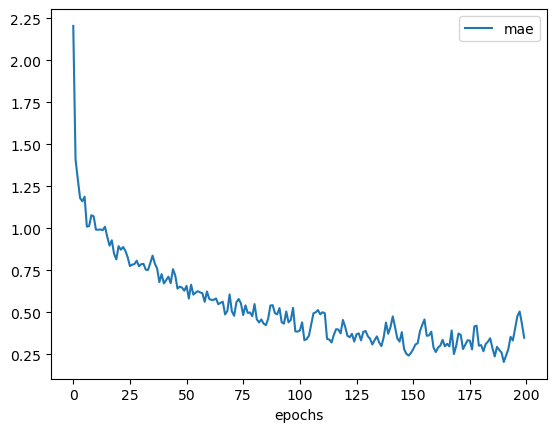

In [78]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['mae']])
plt.xlabel("epochs")
#plt.savefig("03_training_history_1_mae.png", dpi=200)

# Evaluate the model on the train and the test set

In [23]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

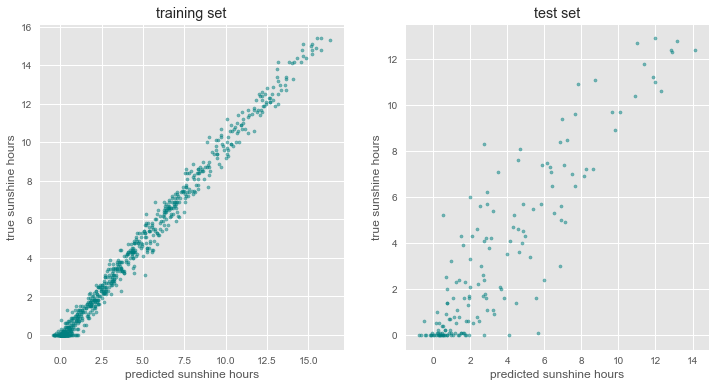

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

plt.savefig("03_regression_compare_training_and_test_performance.png", dpi=200)

Text(0, 0.5, 'true sunshine hours')

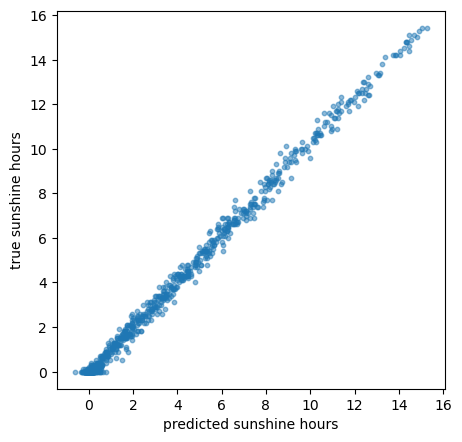

In [16]:
y_predicted = model.predict(X_train)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_train, s=10, alpha=0.5)
plt.xlabel("predicted sunshine hours")
plt.ylabel("true sunshine hours")

Text(0, 0.5, 'true sunshine hours')

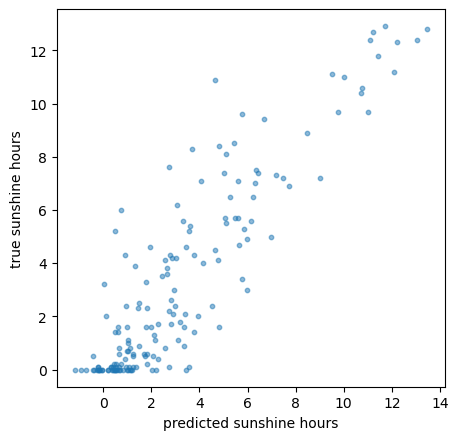

In [17]:
y_predicted = model.predict(X_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_test, s=10, alpha=0.5)
plt.xlabel("predicted sunshine hours")
plt.ylabel("true sunshine hours")

# Use the validation set to monitor the training process

In [25]:
model = create_nn(n_features=152, n_predictions=1)
model.compile(loss='mse', optimizer=Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 152)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               15300     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 20,401
Trainable params: 20,401
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val), verbose = 2)

Epoch 1/200
24/24 - 1s - loss: 23.8096 - root_mean_squared_error: 4.8795 - val_loss: 8.2029 - val_root_mean_squared_error: 2.8641
Epoch 2/200
24/24 - 0s - loss: 5.8992 - root_mean_squared_error: 2.4288 - val_loss: 4.1786 - val_root_mean_squared_error: 2.0442
Epoch 3/200
24/24 - 0s - loss: 3.5137 - root_mean_squared_error: 1.8745 - val_loss: 2.9264 - val_root_mean_squared_error: 1.7107
Epoch 4/200
24/24 - 0s - loss: 2.9117 - root_mean_squared_error: 1.7064 - val_loss: 2.5682 - val_root_mean_squared_error: 1.6026
Epoch 5/200
24/24 - 0s - loss: 2.6618 - root_mean_squared_error: 1.6315 - val_loss: 2.9230 - val_root_mean_squared_error: 1.7097
Epoch 6/200
24/24 - 0s - loss: 2.3543 - root_mean_squared_error: 1.5344 - val_loss: 2.3559 - val_root_mean_squared_error: 1.5349
Epoch 7/200
24/24 - 0s - loss: 2.3047 - root_mean_squared_error: 1.5181 - val_loss: 2.5335 - val_root_mean_squared_error: 1.5917
Epoch 8/200
24/24 - 0s - loss: 2.3847 - root_mean_squared_error: 1.5442 - val_loss: 3.0978 - val

24/24 - 0s - loss: 0.5780 - root_mean_squared_error: 0.7603 - val_loss: 2.1375 - val_root_mean_squared_error: 1.4620
Epoch 65/200
24/24 - 0s - loss: 0.6810 - root_mean_squared_error: 0.8252 - val_loss: 2.0061 - val_root_mean_squared_error: 1.4164
Epoch 66/200
24/24 - 0s - loss: 0.6585 - root_mean_squared_error: 0.8115 - val_loss: 2.1353 - val_root_mean_squared_error: 1.4613
Epoch 67/200
24/24 - 0s - loss: 0.6092 - root_mean_squared_error: 0.7805 - val_loss: 1.9210 - val_root_mean_squared_error: 1.3860
Epoch 68/200
24/24 - 0s - loss: 0.6193 - root_mean_squared_error: 0.7869 - val_loss: 2.1109 - val_root_mean_squared_error: 1.4529
Epoch 69/200
24/24 - 0s - loss: 0.5543 - root_mean_squared_error: 0.7445 - val_loss: 2.2268 - val_root_mean_squared_error: 1.4922
Epoch 70/200
24/24 - 0s - loss: 0.5282 - root_mean_squared_error: 0.7268 - val_loss: 2.0108 - val_root_mean_squared_error: 1.4180
Epoch 71/200
24/24 - 0s - loss: 0.4512 - root_mean_squared_error: 0.6717 - val_loss: 2.0720 - val_root_

Epoch 127/200
24/24 - 0s - loss: 0.2714 - root_mean_squared_error: 0.5210 - val_loss: 2.3030 - val_root_mean_squared_error: 1.5176
Epoch 128/200
24/24 - 0s - loss: 0.2319 - root_mean_squared_error: 0.4815 - val_loss: 2.3189 - val_root_mean_squared_error: 1.5228
Epoch 129/200
24/24 - 0s - loss: 0.2433 - root_mean_squared_error: 0.4932 - val_loss: 2.3092 - val_root_mean_squared_error: 1.5196
Epoch 130/200
24/24 - 0s - loss: 0.2218 - root_mean_squared_error: 0.4710 - val_loss: 2.5051 - val_root_mean_squared_error: 1.5828
Epoch 131/200
24/24 - 0s - loss: 0.2386 - root_mean_squared_error: 0.4885 - val_loss: 2.1259 - val_root_mean_squared_error: 1.4580
Epoch 132/200
24/24 - 0s - loss: 0.1747 - root_mean_squared_error: 0.4180 - val_loss: 2.1584 - val_root_mean_squared_error: 1.4692
Epoch 133/200
24/24 - 0s - loss: 0.3290 - root_mean_squared_error: 0.5736 - val_loss: 2.1540 - val_root_mean_squared_error: 1.4677
Epoch 134/200
24/24 - 0s - loss: 0.2265 - root_mean_squared_error: 0.4759 - val_los

Epoch 190/200
24/24 - 0s - loss: 0.0610 - root_mean_squared_error: 0.2470 - val_loss: 2.2573 - val_root_mean_squared_error: 1.5024
Epoch 191/200
24/24 - 0s - loss: 0.0625 - root_mean_squared_error: 0.2500 - val_loss: 2.2525 - val_root_mean_squared_error: 1.5008
Epoch 192/200
24/24 - 0s - loss: 0.0838 - root_mean_squared_error: 0.2896 - val_loss: 2.1434 - val_root_mean_squared_error: 1.4641
Epoch 193/200
24/24 - 0s - loss: 0.0887 - root_mean_squared_error: 0.2979 - val_loss: 2.1306 - val_root_mean_squared_error: 1.4596
Epoch 194/200
24/24 - 0s - loss: 0.0855 - root_mean_squared_error: 0.2923 - val_loss: 2.2093 - val_root_mean_squared_error: 1.4864
Epoch 195/200
24/24 - 0s - loss: 0.1056 - root_mean_squared_error: 0.3249 - val_loss: 2.2417 - val_root_mean_squared_error: 1.4972
Epoch 196/200
24/24 - 0s - loss: 0.0871 - root_mean_squared_error: 0.2951 - val_loss: 2.2484 - val_root_mean_squared_error: 1.4995
Epoch 197/200
24/24 - 0s - loss: 0.0988 - root_mean_squared_error: 0.3143 - val_los

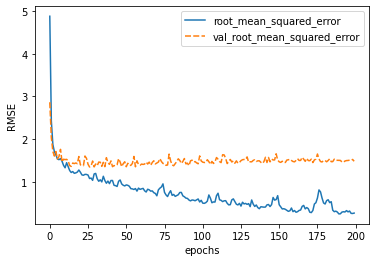

In [31]:
import seaborn as sns

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.savefig("03_training_history_2_rmse.png", dpi=200)

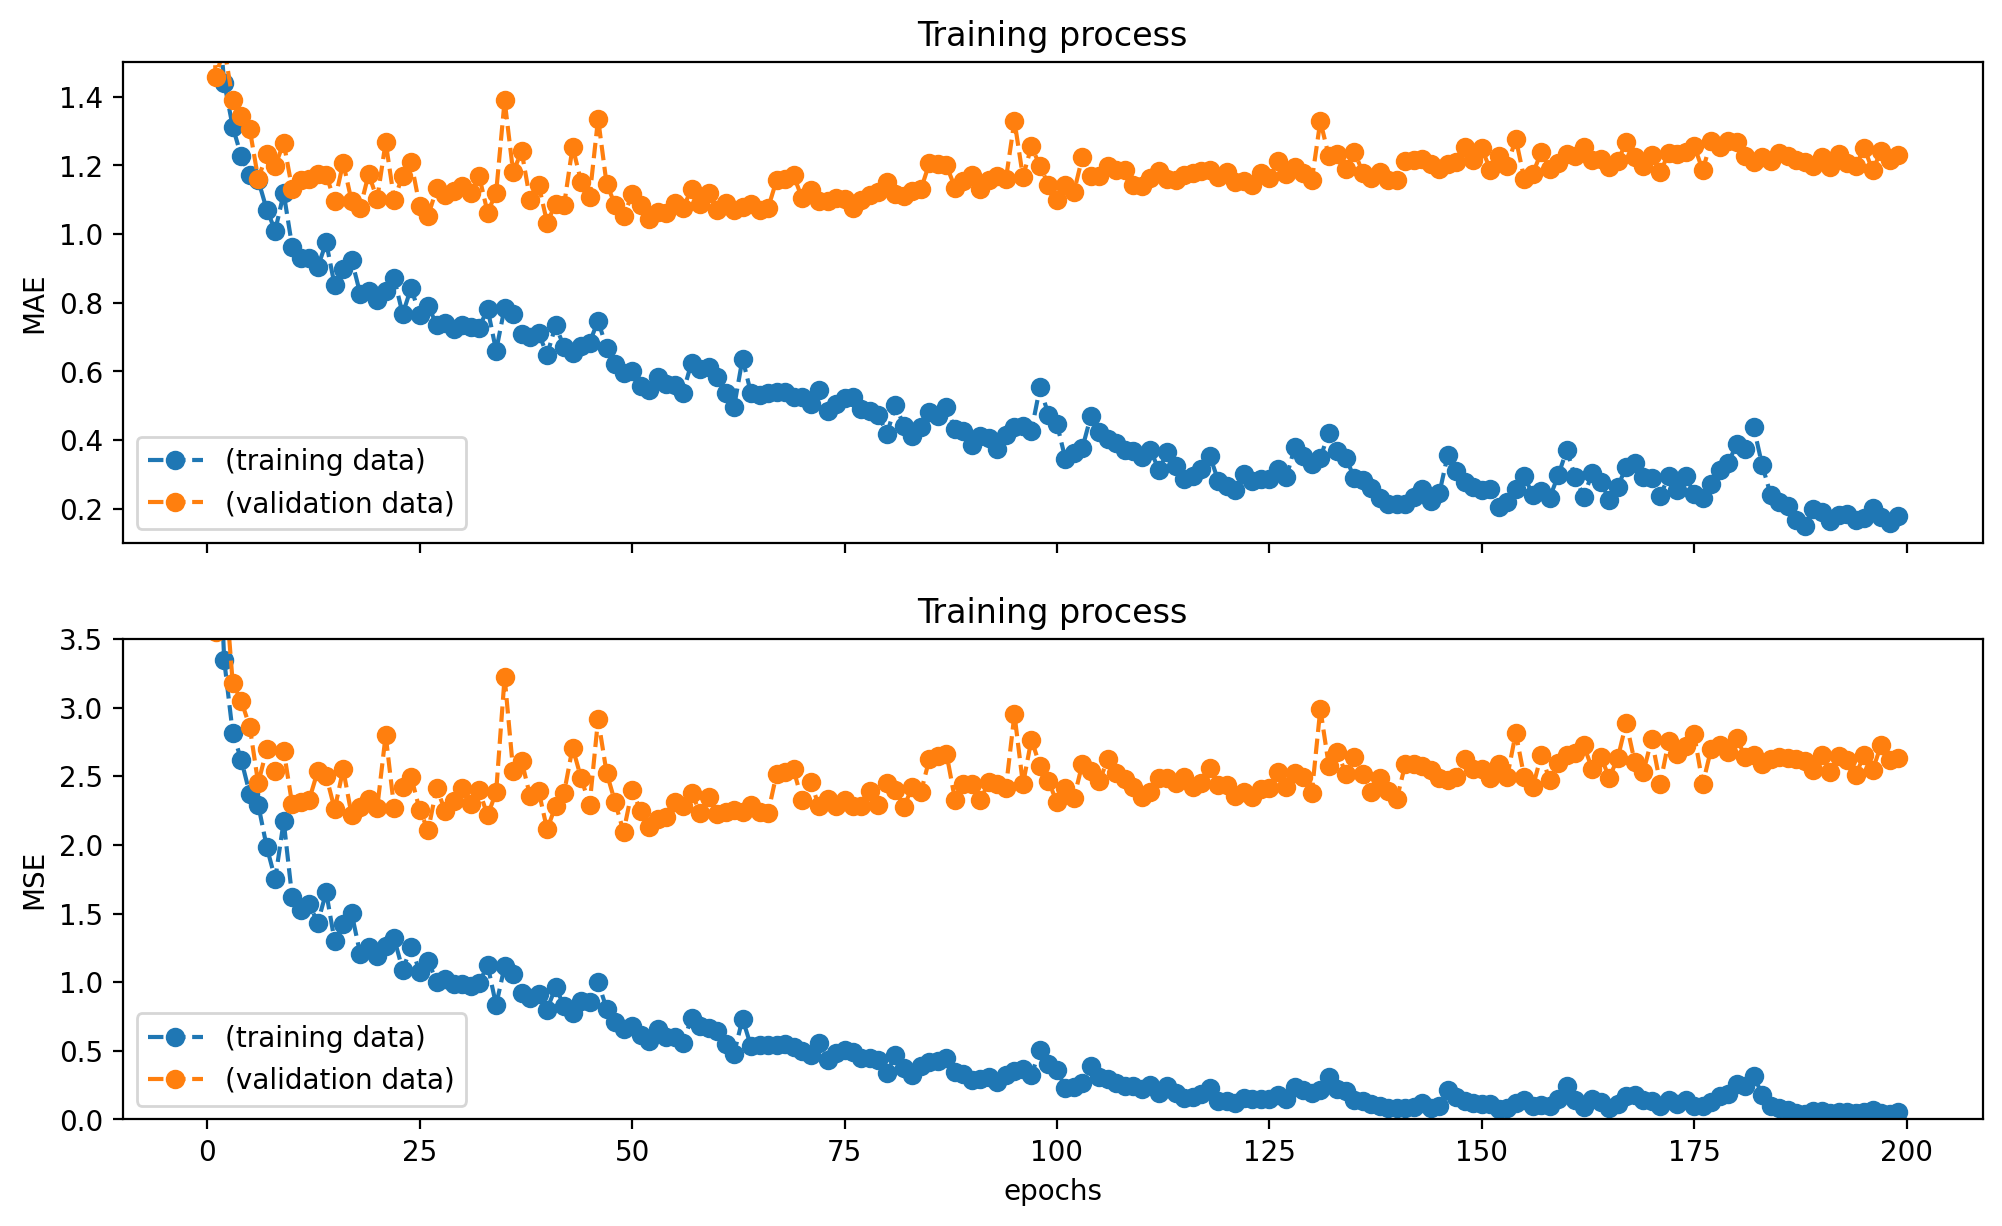

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['mae'], "o--", label='(training data)')
ax1.plot(history.history['val_mae'], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("MAE")
ax1.set_ylim((0.1, 1.5))
ax1.legend()

ax2.plot(history.history['mse'], "o--", label='(training data)')
ax2.plot(history.history['val_mse'], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("MSE")
ax2.set_xlabel("epochs")
ax2.set_ylim((0, 3.5))
ax2.legend()

## Multiple observations --> somethings wrong with training!
- Severe overfitting! (validation loss >> training loss)
- No smooth learning process: Large jumps in losses over epochs!

## Early stopping

## Remedy 1: lower the learning rate!
- lower learning rate also means --> train for more epochs (slower)

In [121]:
model = create_nn(n_features, n_predictions)
model.compile(loss='mse', optimizer=Adam(1e-4), metrics=['mse', 'mae'])
model.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 144)]             0         
_________________________________________________________________
dense_86 (Dense)             (None, 100)               14500     
_________________________________________________________________
dense_87 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 51        
Total params: 19,601
Trainable params: 19,601
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = model.fit(X_train, Y_train,
                    batch_size = 32,
                    epochs = 400,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/400
24/24 - 1s - loss: 64.8227 - mse: 64.8227 - mae: 6.2215 - val_loss: 23.9380 - val_mse: 23.9380 - val_mae: 3.7865
Epoch 2/400
24/24 - 0s - loss: 14.4658 - mse: 14.4658 - mae: 3.1431 - val_loss: 15.4420 - val_mse: 15.4420 - val_mae: 3.3924
Epoch 3/400
24/24 - 0s - loss: 12.0285 - mse: 12.0285 - mae: 2.8545 - val_loss: 12.4017 - val_mse: 12.4017 - val_mae: 2.9347
Epoch 4/400
24/24 - 0s - loss: 10.3976 - mse: 10.3976 - mae: 2.5986 - val_loss: 11.1651 - val_mse: 11.1651 - val_mae: 2.8126
Epoch 5/400
24/24 - 0s - loss: 9.2798 - mse: 9.2798 - mae: 2.4408 - val_loss: 10.1637 - val_mse: 10.1637 - val_mae: 2.6868
Epoch 6/400
24/24 - 0s - loss: 8.3716 - mse: 8.3716 - mae: 2.3042 - val_loss: 9.2637 - val_mse: 9.2637 - val_mae: 2.5709
Epoch 7/400
24/24 - 0s - loss: 7.4819 - mse: 7.4819 - mae: 2.1673 - val_loss: 8.5487 - val_mse: 8.5487 - val_mae: 2.4717
Epoch 8/400
24/24 - 0s - loss: 6.7496 - mse: 6.7496 - mae: 2.0688 - val_loss: 7.7639 - val_mse: 7.7639 - val_mae: 2.3489
Epoch 9/400
24

Epoch 69/400
24/24 - 0s - loss: 1.4278 - mse: 1.4278 - mae: 0.9141 - val_loss: 2.1417 - val_mse: 2.1417 - val_mae: 1.1310
Epoch 70/400
24/24 - 0s - loss: 1.4442 - mse: 1.4442 - mae: 0.9088 - val_loss: 2.2197 - val_mse: 2.2197 - val_mae: 1.1496
Epoch 71/400
24/24 - 0s - loss: 1.4606 - mse: 1.4606 - mae: 0.9154 - val_loss: 2.0956 - val_mse: 2.0956 - val_mae: 1.1067
Epoch 72/400
24/24 - 0s - loss: 1.4198 - mse: 1.4198 - mae: 0.9087 - val_loss: 2.0758 - val_mse: 2.0758 - val_mae: 1.1044
Epoch 73/400
24/24 - 0s - loss: 1.4146 - mse: 1.4146 - mae: 0.9051 - val_loss: 2.0493 - val_mse: 2.0493 - val_mae: 1.0914
Epoch 74/400
24/24 - 0s - loss: 1.4052 - mse: 1.4052 - mae: 0.9024 - val_loss: 2.1521 - val_mse: 2.1521 - val_mae: 1.1297
Epoch 75/400
24/24 - 0s - loss: 1.4221 - mse: 1.4221 - mae: 0.9087 - val_loss: 2.0660 - val_mse: 2.0660 - val_mae: 1.0877
Epoch 76/400
24/24 - 0s - loss: 1.3780 - mse: 1.3780 - mae: 0.8930 - val_loss: 2.0978 - val_mse: 2.0978 - val_mae: 1.1101
Epoch 77/400
24/24 - 0s 

Epoch 136/400
24/24 - 0s - loss: 1.0045 - mse: 1.0045 - mae: 0.7370 - val_loss: 2.0201 - val_mse: 2.0201 - val_mae: 1.0753
Epoch 137/400
24/24 - 0s - loss: 1.0193 - mse: 1.0193 - mae: 0.7424 - val_loss: 2.1293 - val_mse: 2.1293 - val_mae: 1.1125
Epoch 138/400
24/24 - 0s - loss: 1.0205 - mse: 1.0205 - mae: 0.7472 - val_loss: 2.0904 - val_mse: 2.0904 - val_mae: 1.1002
Epoch 139/400
24/24 - 0s - loss: 1.1008 - mse: 1.1008 - mae: 0.7769 - val_loss: 2.0570 - val_mse: 2.0570 - val_mae: 1.0812
Epoch 140/400
24/24 - 0s - loss: 1.0079 - mse: 1.0079 - mae: 0.7324 - val_loss: 2.0812 - val_mse: 2.0812 - val_mae: 1.0932
Epoch 141/400
24/24 - 0s - loss: 1.0296 - mse: 1.0296 - mae: 0.7464 - val_loss: 2.1710 - val_mse: 2.1710 - val_mae: 1.1275
Epoch 142/400
24/24 - 0s - loss: 1.0103 - mse: 1.0103 - mae: 0.7403 - val_loss: 2.0625 - val_mse: 2.0625 - val_mae: 1.0906
Epoch 143/400
24/24 - 0s - loss: 1.0040 - mse: 1.0040 - mae: 0.7408 - val_loss: 2.1682 - val_mse: 2.1682 - val_mae: 1.1284
Epoch 144/400
24

Epoch 203/400
24/24 - 0s - loss: 0.7539 - mse: 0.7539 - mae: 0.6249 - val_loss: 2.1908 - val_mse: 2.1908 - val_mae: 1.1388
Epoch 204/400
24/24 - 0s - loss: 0.7254 - mse: 0.7254 - mae: 0.6107 - val_loss: 2.1152 - val_mse: 2.1152 - val_mae: 1.1135
Epoch 205/400
24/24 - 0s - loss: 0.7284 - mse: 0.7284 - mae: 0.6231 - val_loss: 2.2614 - val_mse: 2.2614 - val_mae: 1.1646
Epoch 206/400
24/24 - 0s - loss: 0.7725 - mse: 0.7725 - mae: 0.6360 - val_loss: 2.2172 - val_mse: 2.2172 - val_mae: 1.1506
Epoch 207/400
24/24 - 0s - loss: 0.7529 - mse: 0.7529 - mae: 0.6390 - val_loss: 2.3000 - val_mse: 2.3000 - val_mae: 1.1700
Epoch 208/400
24/24 - 0s - loss: 0.7418 - mse: 0.7418 - mae: 0.6227 - val_loss: 2.1667 - val_mse: 2.1667 - val_mae: 1.1308
Epoch 209/400
24/24 - 0s - loss: 0.7028 - mse: 0.7028 - mae: 0.5973 - val_loss: 2.1816 - val_mse: 2.1816 - val_mae: 1.1369
Epoch 210/400
24/24 - 0s - loss: 0.7025 - mse: 0.7025 - mae: 0.5979 - val_loss: 2.3090 - val_mse: 2.3090 - val_mae: 1.1807
Epoch 211/400
24

Epoch 270/400
24/24 - 0s - loss: 0.5408 - mse: 0.5408 - mae: 0.5267 - val_loss: 2.3192 - val_mse: 2.3192 - val_mae: 1.1803
Epoch 271/400
24/24 - 0s - loss: 0.5095 - mse: 0.5095 - mae: 0.5020 - val_loss: 2.5188 - val_mse: 2.5188 - val_mae: 1.2477
Epoch 272/400
24/24 - 0s - loss: 0.5602 - mse: 0.5602 - mae: 0.5350 - val_loss: 2.4505 - val_mse: 2.4505 - val_mae: 1.2246
Epoch 273/400
24/24 - 0s - loss: 0.5217 - mse: 0.5217 - mae: 0.5139 - val_loss: 2.2782 - val_mse: 2.2782 - val_mae: 1.1699
Epoch 274/400
24/24 - 0s - loss: 0.4944 - mse: 0.4944 - mae: 0.4965 - val_loss: 2.4119 - val_mse: 2.4119 - val_mae: 1.2190
Epoch 275/400
24/24 - 0s - loss: 0.4939 - mse: 0.4939 - mae: 0.4869 - val_loss: 2.3756 - val_mse: 2.3756 - val_mae: 1.1985
Epoch 276/400
24/24 - 0s - loss: 0.5069 - mse: 0.5069 - mae: 0.5020 - val_loss: 2.3396 - val_mse: 2.3396 - val_mae: 1.1929
Epoch 277/400
24/24 - 0s - loss: 0.5123 - mse: 0.5123 - mae: 0.5062 - val_loss: 2.3426 - val_mse: 2.3426 - val_mae: 1.1981
Epoch 278/400
24

Epoch 337/400
24/24 - 0s - loss: 0.3722 - mse: 0.3722 - mae: 0.4101 - val_loss: 2.4542 - val_mse: 2.4542 - val_mae: 1.2236
Epoch 338/400
24/24 - 0s - loss: 0.3501 - mse: 0.3501 - mae: 0.3921 - val_loss: 2.5022 - val_mse: 2.5022 - val_mae: 1.2437
Epoch 339/400
24/24 - 0s - loss: 0.3417 - mse: 0.3417 - mae: 0.3993 - val_loss: 2.5407 - val_mse: 2.5407 - val_mae: 1.2546
Epoch 340/400
24/24 - 0s - loss: 0.3526 - mse: 0.3526 - mae: 0.4127 - val_loss: 2.6282 - val_mse: 2.6282 - val_mae: 1.2757
Epoch 341/400
24/24 - 0s - loss: 0.3424 - mse: 0.3424 - mae: 0.4015 - val_loss: 2.4868 - val_mse: 2.4868 - val_mae: 1.2293
Epoch 342/400
24/24 - 0s - loss: 0.3485 - mse: 0.3485 - mae: 0.4060 - val_loss: 2.5278 - val_mse: 2.5278 - val_mae: 1.2470
Epoch 343/400
24/24 - 0s - loss: 0.3297 - mse: 0.3297 - mae: 0.3934 - val_loss: 2.5599 - val_mse: 2.5599 - val_mae: 1.2604
Epoch 344/400
24/24 - 0s - loss: 0.3367 - mse: 0.3367 - mae: 0.3974 - val_loss: 2.4495 - val_mse: 2.4495 - val_mae: 1.2112
Epoch 345/400
24

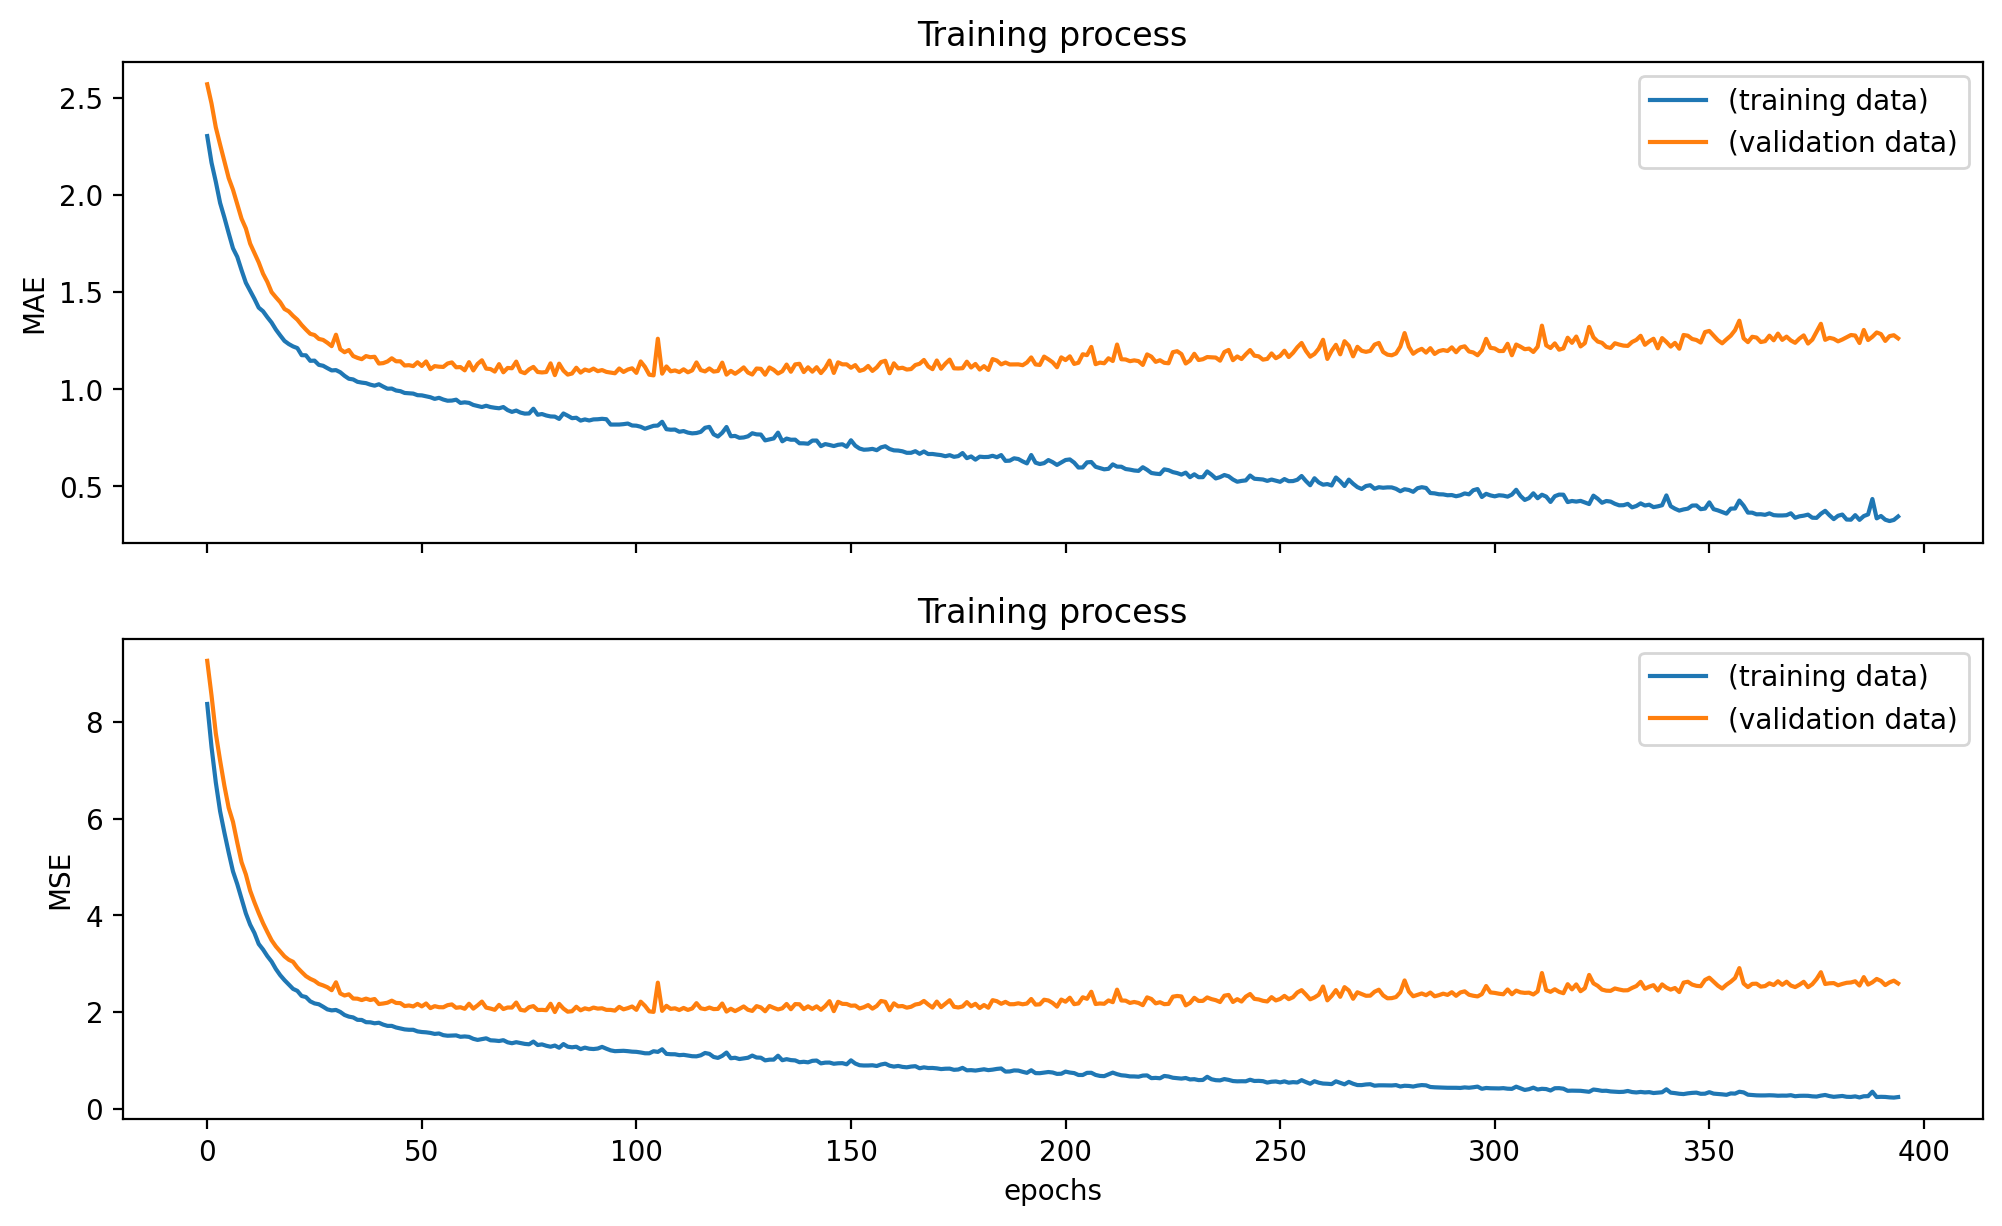

In [123]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['mae'][5:], "-", label='(training data)')
ax1.plot(history.history['val_mae'][5:], "-", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("MAE")
ax1.legend()

ax2.plot(history.history['mse'][5:], "-", label='(training data)')
ax2.plot(history.history['val_mse'][5:], "-", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("MSE")
ax2.set_xlabel("epochs")
ax2.legend()

## Conclusions:
- lowering learning rate makes training progress smoother
- overfitting is still very clearly visible

## Remedy 2: add batchnorm
- allows higher learning rate --> speeds up training!

In [124]:
n_features = X_data.shape[1]
n_predictions = 1

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = BatchNormalization()(layers_input)
    layers_dense = Dense(100, 'relu')(layers_dense)
    layers_dense = BatchNormalization()(layers_dense)
    layers_dense = Dense(50, 'relu')(layers_dense)

    # Output layer
    layers_output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output)

model = create_nn(n_features, n_predictions)
model.compile(loss='mse', optimizer=Adam(1e-3), metrics=['mse', 'mae'])
model.summary()

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 144)]             0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 144)               576       
_________________________________________________________________
dense_89 (Dense)             (None, 100)               14500     
_________________________________________________________________
batch_normalization_25 (Batc (None, 100)               400       
_________________________________________________________________
dense_90 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 51        
Total params: 20,577
Trainable params: 20,089
Non-trainable params: 488
____________________________________________________

In [125]:
history = model.fit(X_train, Y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
24/24 - 1s - loss: 21.2844 - mse: 21.2844 - mae: 3.5209 - val_loss: 22.2706 - val_mse: 22.2706 - val_mae: 3.7043
Epoch 2/200
24/24 - 0s - loss: 7.0700 - mse: 7.0700 - mae: 2.0433 - val_loss: 10.0225 - val_mse: 10.0225 - val_mae: 2.4542
Epoch 3/200
24/24 - 0s - loss: 4.3742 - mse: 4.3742 - mae: 1.5710 - val_loss: 9.0802 - val_mse: 9.0802 - val_mae: 2.3631
Epoch 4/200
24/24 - 0s - loss: 3.3616 - mse: 3.3616 - mae: 1.4167 - val_loss: 5.3652 - val_mse: 5.3652 - val_mae: 1.7528
Epoch 5/200
24/24 - 0s - loss: 2.6373 - mse: 2.6373 - mae: 1.2498 - val_loss: 5.5609 - val_mse: 5.5609 - val_mae: 1.8223
Epoch 6/200
24/24 - 0s - loss: 2.7323 - mse: 2.7323 - mae: 1.2552 - val_loss: 3.5826 - val_mse: 3.5826 - val_mae: 1.4163
Epoch 7/200
24/24 - 0s - loss: 2.1751 - mse: 2.1751 - mae: 1.1222 - val_loss: 3.2303 - val_mse: 3.2303 - val_mae: 1.3680
Epoch 8/200
24/24 - 0s - loss: 2.0769 - mse: 2.0769 - mae: 1.0878 - val_loss: 2.6823 - val_mse: 2.6823 - val_mae: 1.2435
Epoch 9/200
24/24 - 0s - l

Epoch 69/200
24/24 - 0s - loss: 0.6349 - mse: 0.6349 - mae: 0.6212 - val_loss: 3.0035 - val_mse: 3.0035 - val_mae: 1.2907
Epoch 70/200
24/24 - 0s - loss: 0.6640 - mse: 0.6640 - mae: 0.6210 - val_loss: 2.7025 - val_mse: 2.7025 - val_mae: 1.1937
Epoch 71/200
24/24 - 0s - loss: 0.4522 - mse: 0.4522 - mae: 0.5227 - val_loss: 2.7570 - val_mse: 2.7570 - val_mae: 1.2079
Epoch 72/200
24/24 - 0s - loss: 0.5298 - mse: 0.5298 - mae: 0.5527 - val_loss: 2.5913 - val_mse: 2.5913 - val_mae: 1.1904
Epoch 73/200
24/24 - 0s - loss: 0.6481 - mse: 0.6481 - mae: 0.6317 - val_loss: 2.5960 - val_mse: 2.5960 - val_mae: 1.1478
Epoch 74/200
24/24 - 0s - loss: 0.6387 - mse: 0.6387 - mae: 0.6189 - val_loss: 2.7156 - val_mse: 2.7156 - val_mae: 1.2292
Epoch 75/200
24/24 - 0s - loss: 0.6844 - mse: 0.6844 - mae: 0.6312 - val_loss: 2.7477 - val_mse: 2.7477 - val_mae: 1.2588
Epoch 76/200
24/24 - 0s - loss: 0.7306 - mse: 0.7306 - mae: 0.6373 - val_loss: 2.4952 - val_mse: 2.4952 - val_mae: 1.1343
Epoch 77/200
24/24 - 0s 

Epoch 136/200
24/24 - 0s - loss: 0.5575 - mse: 0.5575 - mae: 0.5690 - val_loss: 2.6826 - val_mse: 2.6826 - val_mae: 1.1632
Epoch 137/200
24/24 - 0s - loss: 0.4861 - mse: 0.4861 - mae: 0.5232 - val_loss: 2.5450 - val_mse: 2.5450 - val_mae: 1.1508
Epoch 138/200
24/24 - 0s - loss: 0.4215 - mse: 0.4215 - mae: 0.4750 - val_loss: 2.7386 - val_mse: 2.7386 - val_mae: 1.2122
Epoch 139/200
24/24 - 0s - loss: 0.4092 - mse: 0.4092 - mae: 0.4897 - val_loss: 2.7081 - val_mse: 2.7081 - val_mae: 1.1950
Epoch 140/200
24/24 - 0s - loss: 0.2945 - mse: 0.2945 - mae: 0.4211 - val_loss: 2.8674 - val_mse: 2.8674 - val_mae: 1.2295
Epoch 141/200
24/24 - 0s - loss: 0.4929 - mse: 0.4929 - mae: 0.5201 - val_loss: 2.9600 - val_mse: 2.9600 - val_mae: 1.2752
Epoch 142/200
24/24 - 0s - loss: 0.5239 - mse: 0.5239 - mae: 0.5248 - val_loss: 2.6680 - val_mse: 2.6680 - val_mae: 1.1849
Epoch 143/200
24/24 - 0s - loss: 0.6194 - mse: 0.6194 - mae: 0.5848 - val_loss: 2.6358 - val_mse: 2.6358 - val_mae: 1.1353
Epoch 144/200
24

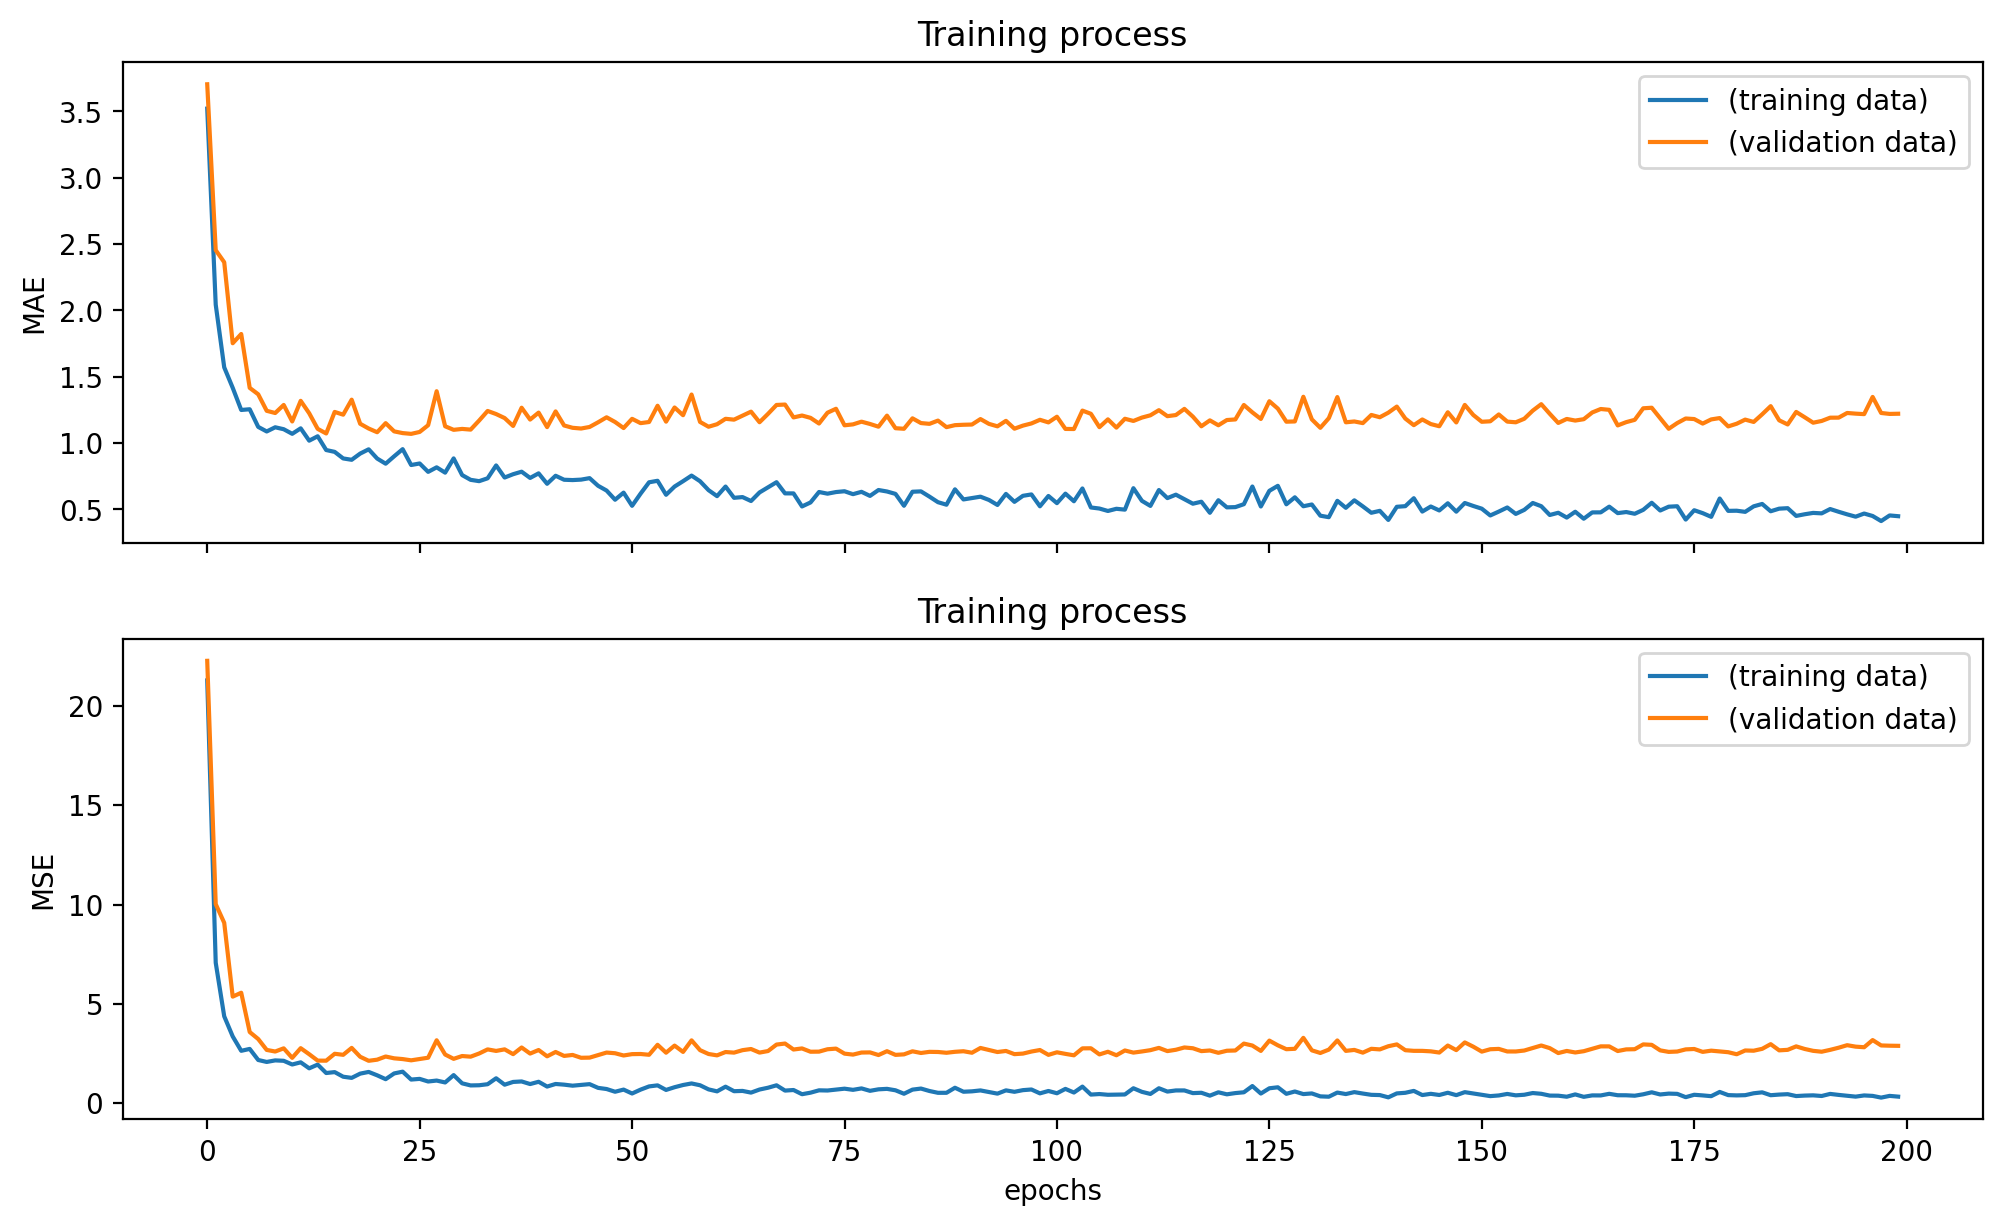

In [126]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['mae'], "-", label='(training data)')
ax1.plot(history.history['val_mae'], "-", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("MAE")
ax1.legend()

ax2.plot(history.history['mse'], "-", label='(training data)')
ax2.plot(history.history['val_mse'], "-", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("MSE")
ax2.set_xlabel("epochs")
ax2.legend()

Text(0, 0.5, 'true values')

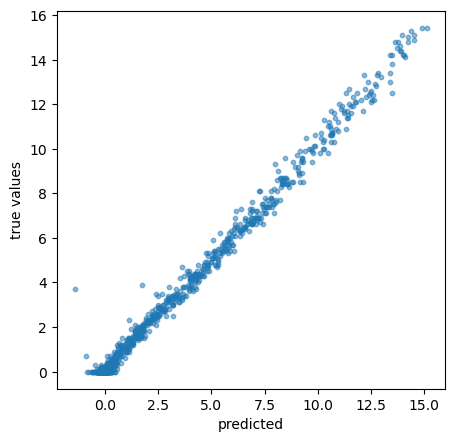

In [127]:
y_predicted = model.predict(X_train)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_train, s=10, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")

Text(0, 0.5, 'true values')

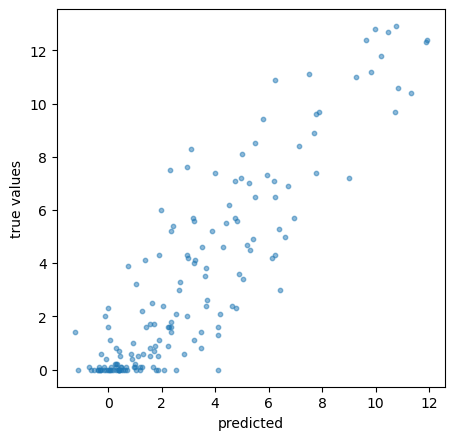

In [128]:
y_predicted = model.predict(X_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_test, s=10, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")

## Remedy 3: make network smaler!

In [129]:
n_features = X_data.shape[1]
n_predictions = 1

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = BatchNormalization()(layers_input)
    layers_dense = Dense(50, 'relu')(layers_input)
    layers_dense = BatchNormalization()(layers_dense)
    layers_dense = Dense(10, 'relu')(layers_dense)

    # Output layer
    layers_output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output)

model = create_nn(n_features, n_predictions)
model.compile(loss='mse', optimizer=Adam(1e-3), metrics=['mse', 'mae'])
model.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 144)]             0         
_________________________________________________________________
dense_92 (Dense)             (None, 50)                7250      
_________________________________________________________________
batch_normalization_27 (Batc (None, 50)                200       
_________________________________________________________________
dense_93 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 11        
Total params: 7,971
Trainable params: 7,871
Non-trainable params: 100
_________________________________________________________________


In [130]:
history = model.fit(X_train, Y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
24/24 - 1s - loss: 23.9036 - mse: 23.9036 - mae: 3.5136 - val_loss: 16.8484 - val_mse: 16.8484 - val_mae: 3.1823
Epoch 2/200
24/24 - 0s - loss: 15.5026 - mse: 15.5026 - mae: 2.8749 - val_loss: 10.3731 - val_mse: 10.3731 - val_mae: 2.4855
Epoch 3/200
24/24 - 0s - loss: 10.8925 - mse: 10.8925 - mae: 2.4617 - val_loss: 11.6344 - val_mse: 11.6344 - val_mae: 2.6533
Epoch 4/200
24/24 - 0s - loss: 7.4349 - mse: 7.4349 - mae: 2.0984 - val_loss: 10.9658 - val_mse: 10.9658 - val_mae: 2.5986
Epoch 5/200
24/24 - 0s - loss: 5.1114 - mse: 5.1114 - mae: 1.7242 - val_loss: 9.4478 - val_mse: 9.4478 - val_mae: 2.3990
Epoch 6/200
24/24 - 0s - loss: 3.6961 - mse: 3.6961 - mae: 1.4725 - val_loss: 4.9289 - val_mse: 4.9289 - val_mae: 1.7401
Epoch 7/200
24/24 - 0s - loss: 3.2895 - mse: 3.2895 - mae: 1.3734 - val_loss: 4.8124 - val_mse: 4.8124 - val_mae: 1.7251
Epoch 8/200
24/24 - 0s - loss: 2.8907 - mse: 2.8907 - mae: 1.2714 - val_loss: 3.0397 - val_mse: 3.0397 - val_mae: 1.3400
Epoch 9/200
24/24 

Epoch 69/200
24/24 - 0s - loss: 1.1999 - mse: 1.1999 - mae: 0.8215 - val_loss: 3.6119 - val_mse: 3.6119 - val_mae: 1.3298
Epoch 70/200
24/24 - 0s - loss: 1.3858 - mse: 1.3858 - mae: 0.8807 - val_loss: 2.9027 - val_mse: 2.9027 - val_mae: 1.1260
Epoch 71/200
24/24 - 0s - loss: 1.1746 - mse: 1.1746 - mae: 0.8335 - val_loss: 2.9211 - val_mse: 2.9211 - val_mae: 1.1148
Epoch 72/200
24/24 - 0s - loss: 1.3680 - mse: 1.3680 - mae: 0.8744 - val_loss: 3.2309 - val_mse: 3.2309 - val_mae: 1.2037
Epoch 73/200
24/24 - 0s - loss: 1.2049 - mse: 1.2049 - mae: 0.8350 - val_loss: 2.7713 - val_mse: 2.7713 - val_mae: 1.0967
Epoch 74/200
24/24 - 0s - loss: 1.4499 - mse: 1.4499 - mae: 0.9165 - val_loss: 2.8202 - val_mse: 2.8202 - val_mae: 1.1191
Epoch 75/200
24/24 - 0s - loss: 1.1375 - mse: 1.1375 - mae: 0.8191 - val_loss: 3.3006 - val_mse: 3.3006 - val_mae: 1.2518
Epoch 76/200
24/24 - 0s - loss: 1.2027 - mse: 1.2027 - mae: 0.8332 - val_loss: 3.1589 - val_mse: 3.1589 - val_mae: 1.1675
Epoch 77/200
24/24 - 0s 

Epoch 136/200
24/24 - 0s - loss: 0.8866 - mse: 0.8866 - mae: 0.7278 - val_loss: 4.7188 - val_mse: 4.7188 - val_mae: 1.5767
Epoch 137/200
24/24 - 0s - loss: 0.9506 - mse: 0.9506 - mae: 0.7332 - val_loss: 3.5313 - val_mse: 3.5313 - val_mae: 1.2572
Epoch 138/200
24/24 - 0s - loss: 0.7347 - mse: 0.7347 - mae: 0.6429 - val_loss: 3.7160 - val_mse: 3.7160 - val_mae: 1.2750
Epoch 139/200
24/24 - 0s - loss: 0.8859 - mse: 0.8859 - mae: 0.7142 - val_loss: 3.9427 - val_mse: 3.9427 - val_mae: 1.3362
Epoch 140/200
24/24 - 0s - loss: 0.9052 - mse: 0.9052 - mae: 0.7044 - val_loss: 4.2823 - val_mse: 4.2823 - val_mae: 1.4494
Epoch 141/200
24/24 - 0s - loss: 0.8069 - mse: 0.8069 - mae: 0.6763 - val_loss: 3.5677 - val_mse: 3.5677 - val_mae: 1.2562
Epoch 142/200
24/24 - 0s - loss: 0.7979 - mse: 0.7979 - mae: 0.6742 - val_loss: 3.4937 - val_mse: 3.4937 - val_mae: 1.2678
Epoch 143/200
24/24 - 0s - loss: 0.8685 - mse: 0.8685 - mae: 0.7119 - val_loss: 3.5689 - val_mse: 3.5689 - val_mae: 1.2488
Epoch 144/200
24

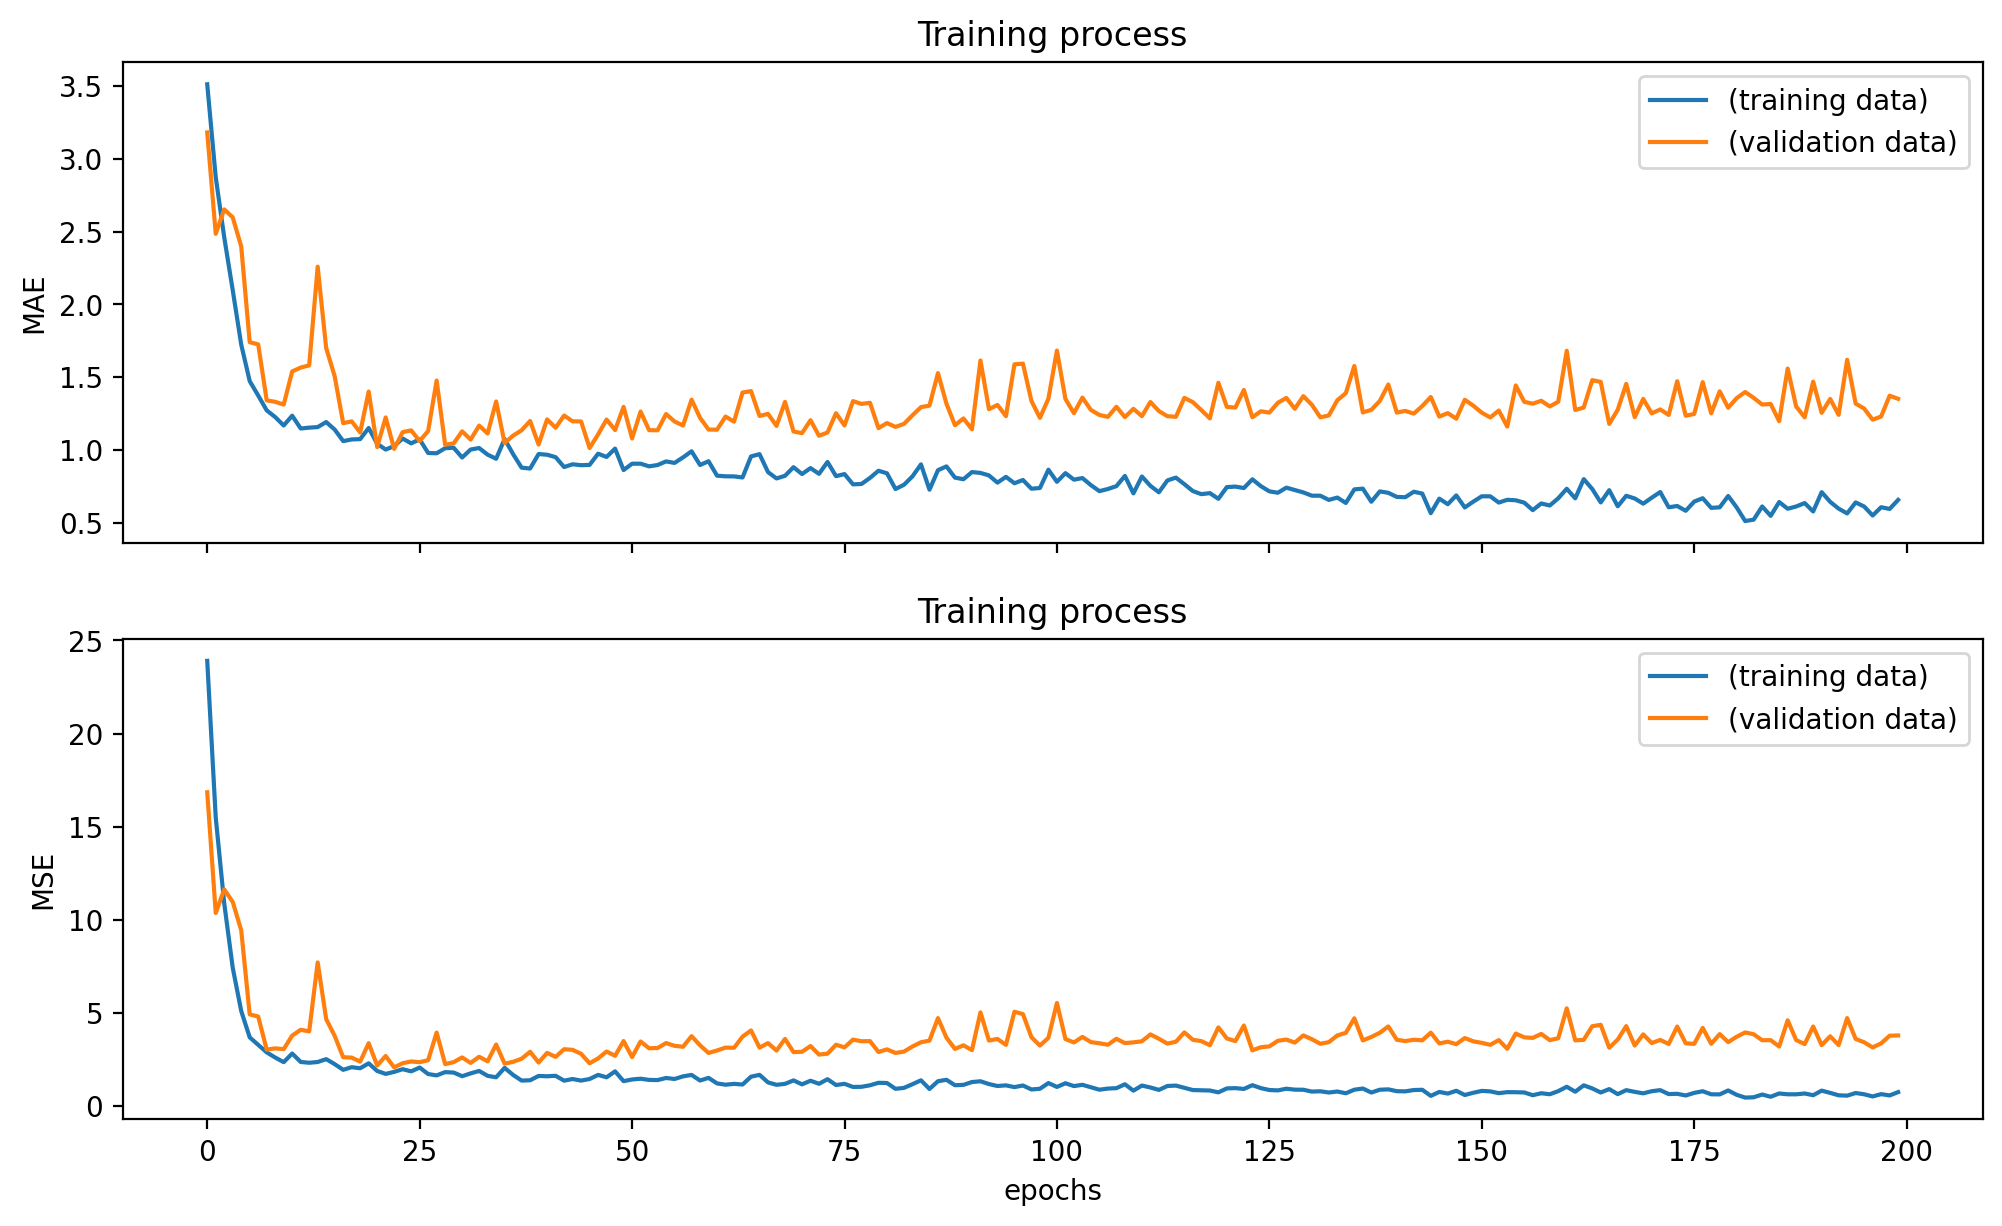

In [133]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['mae'], "-", label='(training data)')
ax1.plot(history.history['val_mae'], "-", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("MAE")
#ax1.set_ylim((0, 2))
ax1.legend()

ax2.plot(history.history['mse'], "-", label='(training data)')
ax2.plot(history.history['val_mse'], "-", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("MSE")
ax2.set_xlabel("epochs")
#ax2.set_ylim((0, 2))
ax2.legend()

## --> here: doesn't work realiably!

## Remedy 4: add dropout

In [134]:
from tensorflow.keras.layers import Dropout

n_features = X_data.shape[1]
n_predictions = 1

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = BatchNormalization()(layers_input)
    layers_dense = Dense(100, 'relu')(layers_input)
    layers_dense = Dropout(rate=0.25)(layers_dense)
    layers_dense = BatchNormalization()(layers_dense)
    layers_dense = Dense(50, 'relu')(layers_dense)
    layers_dense = Dropout(rate=0.25)(layers_dense)

    # Output layer
    layers_output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output)

model = create_nn(n_features, n_predictions)
model.compile(loss='mse', optimizer=Adam(1e-4), metrics=['mse', 'mae'])
model.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 144)]             0         
_________________________________________________________________
dense_95 (Dense)             (None, 100)               14500     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 100)               400       
_________________________________________________________________
dense_96 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 51 

In [135]:
history = model.fit(X_train, Y_train,
                    batch_size = 32,
                    epochs = 400,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/400
24/24 - 1s - loss: 30.0522 - mse: 30.0522 - mae: 4.0767 - val_loss: 14.0580 - val_mse: 14.0580 - val_mae: 2.8344
Epoch 2/400
24/24 - 0s - loss: 27.3079 - mse: 27.3079 - mae: 3.9087 - val_loss: 14.8604 - val_mse: 14.8604 - val_mae: 2.8491
Epoch 3/400
24/24 - 0s - loss: 24.9732 - mse: 24.9732 - mae: 3.7339 - val_loss: 15.3889 - val_mse: 15.3889 - val_mae: 2.8972
Epoch 4/400
24/24 - 0s - loss: 23.4443 - mse: 23.4443 - mae: 3.6188 - val_loss: 15.3904 - val_mse: 15.3904 - val_mae: 2.9233
Epoch 5/400
24/24 - 0s - loss: 21.3038 - mse: 21.3038 - mae: 3.4821 - val_loss: 15.4735 - val_mse: 15.4735 - val_mae: 2.9433
Epoch 6/400
24/24 - 0s - loss: 19.5722 - mse: 19.5722 - mae: 3.3233 - val_loss: 15.1395 - val_mse: 15.1395 - val_mae: 2.9043
Epoch 7/400
24/24 - 0s - loss: 18.7172 - mse: 18.7172 - mae: 3.2414 - val_loss: 14.7969 - val_mse: 14.7969 - val_mae: 2.8704
Epoch 8/400
24/24 - 0s - loss: 16.6851 - mse: 16.6851 - mae: 3.0934 - val_loss: 14.7838 - val_mse: 14.7838 - val_mae: 2.8725


Epoch 68/400
24/24 - 0s - loss: 4.4518 - mse: 4.4518 - mae: 1.5913 - val_loss: 2.8118 - val_mse: 2.8118 - val_mae: 1.2765
Epoch 69/400
24/24 - 0s - loss: 3.5871 - mse: 3.5871 - mae: 1.4544 - val_loss: 2.8064 - val_mse: 2.8064 - val_mae: 1.2664
Epoch 70/400
24/24 - 0s - loss: 4.4396 - mse: 4.4396 - mae: 1.5725 - val_loss: 2.8323 - val_mse: 2.8323 - val_mae: 1.2718
Epoch 71/400
24/24 - 0s - loss: 4.4293 - mse: 4.4293 - mae: 1.6027 - val_loss: 2.7786 - val_mse: 2.7786 - val_mae: 1.2719
Epoch 72/400
24/24 - 0s - loss: 4.3562 - mse: 4.3562 - mae: 1.5915 - val_loss: 3.0366 - val_mse: 3.0366 - val_mae: 1.3102
Epoch 73/400
24/24 - 0s - loss: 4.5209 - mse: 4.5209 - mae: 1.6193 - val_loss: 2.8795 - val_mse: 2.8795 - val_mae: 1.2832
Epoch 74/400
24/24 - 0s - loss: 5.0262 - mse: 5.0262 - mae: 1.6759 - val_loss: 2.8784 - val_mse: 2.8784 - val_mae: 1.2823
Epoch 75/400
24/24 - 0s - loss: 3.9723 - mse: 3.9723 - mae: 1.5029 - val_loss: 2.9291 - val_mse: 2.9291 - val_mae: 1.2780
Epoch 76/400
24/24 - 0s 

Epoch 135/400
24/24 - 0s - loss: 3.0893 - mse: 3.0893 - mae: 1.3051 - val_loss: 2.5298 - val_mse: 2.5298 - val_mae: 1.1030
Epoch 136/400
24/24 - 0s - loss: 3.1849 - mse: 3.1849 - mae: 1.3429 - val_loss: 2.7178 - val_mse: 2.7178 - val_mae: 1.1473
Epoch 137/400
24/24 - 0s - loss: 3.4537 - mse: 3.4537 - mae: 1.3627 - val_loss: 2.7478 - val_mse: 2.7478 - val_mae: 1.1595
Epoch 138/400
24/24 - 0s - loss: 3.6915 - mse: 3.6915 - mae: 1.4605 - val_loss: 2.6902 - val_mse: 2.6902 - val_mae: 1.1569
Epoch 139/400
24/24 - 0s - loss: 2.9705 - mse: 2.9705 - mae: 1.3064 - val_loss: 2.5089 - val_mse: 2.5089 - val_mae: 1.1069
Epoch 140/400
24/24 - 0s - loss: 3.3017 - mse: 3.3017 - mae: 1.3597 - val_loss: 2.8502 - val_mse: 2.8502 - val_mae: 1.1863
Epoch 141/400
24/24 - 0s - loss: 2.9542 - mse: 2.9542 - mae: 1.3182 - val_loss: 2.5505 - val_mse: 2.5505 - val_mae: 1.1124
Epoch 142/400
24/24 - 0s - loss: 3.4072 - mse: 3.4072 - mae: 1.3645 - val_loss: 2.8293 - val_mse: 2.8293 - val_mae: 1.1720
Epoch 143/400
24

Epoch 202/400
24/24 - 0s - loss: 2.6826 - mse: 2.6826 - mae: 1.2385 - val_loss: 2.7411 - val_mse: 2.7411 - val_mae: 1.1304
Epoch 203/400
24/24 - 0s - loss: 2.6657 - mse: 2.6657 - mae: 1.2410 - val_loss: 2.7361 - val_mse: 2.7361 - val_mae: 1.1203
Epoch 204/400
24/24 - 0s - loss: 2.7911 - mse: 2.7911 - mae: 1.2526 - val_loss: 2.8428 - val_mse: 2.8428 - val_mae: 1.1521
Epoch 205/400
24/24 - 0s - loss: 2.8723 - mse: 2.8723 - mae: 1.2682 - val_loss: 2.5909 - val_mse: 2.5909 - val_mae: 1.0758
Epoch 206/400
24/24 - 0s - loss: 2.7515 - mse: 2.7515 - mae: 1.2386 - val_loss: 2.5882 - val_mse: 2.5882 - val_mae: 1.0746
Epoch 207/400
24/24 - 0s - loss: 2.9400 - mse: 2.9400 - mae: 1.2857 - val_loss: 2.5930 - val_mse: 2.5930 - val_mae: 1.0783
Epoch 208/400
24/24 - 0s - loss: 2.7994 - mse: 2.7994 - mae: 1.2646 - val_loss: 2.5290 - val_mse: 2.5290 - val_mae: 1.0679
Epoch 209/400
24/24 - 0s - loss: 2.6172 - mse: 2.6172 - mae: 1.2299 - val_loss: 2.5670 - val_mse: 2.5670 - val_mae: 1.0757
Epoch 210/400
24

Epoch 269/400
24/24 - 0s - loss: 2.6223 - mse: 2.6223 - mae: 1.1770 - val_loss: 2.5880 - val_mse: 2.5880 - val_mae: 1.0872
Epoch 270/400
24/24 - 0s - loss: 2.1801 - mse: 2.1801 - mae: 1.0899 - val_loss: 2.5349 - val_mse: 2.5349 - val_mae: 1.0611
Epoch 271/400
24/24 - 0s - loss: 2.3869 - mse: 2.3869 - mae: 1.1883 - val_loss: 2.7039 - val_mse: 2.7039 - val_mae: 1.1122
Epoch 272/400
24/24 - 0s - loss: 2.3945 - mse: 2.3945 - mae: 1.1509 - val_loss: 2.6916 - val_mse: 2.6916 - val_mae: 1.1039
Epoch 273/400
24/24 - 0s - loss: 2.7183 - mse: 2.7183 - mae: 1.2163 - val_loss: 2.6790 - val_mse: 2.6790 - val_mae: 1.0993
Epoch 274/400
24/24 - 0s - loss: 2.4506 - mse: 2.4506 - mae: 1.1556 - val_loss: 2.7658 - val_mse: 2.7658 - val_mae: 1.1216
Epoch 275/400
24/24 - 0s - loss: 2.5017 - mse: 2.5017 - mae: 1.1775 - val_loss: 2.6374 - val_mse: 2.6374 - val_mae: 1.0778
Epoch 276/400
24/24 - 0s - loss: 2.6197 - mse: 2.6197 - mae: 1.1939 - val_loss: 2.7867 - val_mse: 2.7867 - val_mae: 1.1257
Epoch 277/400
24

Epoch 336/400
24/24 - 0s - loss: 2.3449 - mse: 2.3449 - mae: 1.1143 - val_loss: 2.7656 - val_mse: 2.7656 - val_mae: 1.1065
Epoch 337/400
24/24 - 0s - loss: 2.1274 - mse: 2.1274 - mae: 1.1063 - val_loss: 2.9385 - val_mse: 2.9385 - val_mae: 1.1554
Epoch 338/400
24/24 - 0s - loss: 2.4333 - mse: 2.4333 - mae: 1.1728 - val_loss: 2.9635 - val_mse: 2.9635 - val_mae: 1.1578
Epoch 339/400
24/24 - 0s - loss: 2.1647 - mse: 2.1647 - mae: 1.0934 - val_loss: 2.7574 - val_mse: 2.7574 - val_mae: 1.0916
Epoch 340/400
24/24 - 0s - loss: 2.2886 - mse: 2.2886 - mae: 1.1050 - val_loss: 2.8133 - val_mse: 2.8133 - val_mae: 1.1181
Epoch 341/400
24/24 - 0s - loss: 2.2278 - mse: 2.2278 - mae: 1.1004 - val_loss: 2.7248 - val_mse: 2.7248 - val_mae: 1.1035
Epoch 342/400
24/24 - 0s - loss: 2.4176 - mse: 2.4176 - mae: 1.1433 - val_loss: 2.6541 - val_mse: 2.6541 - val_mae: 1.0683
Epoch 343/400
24/24 - 0s - loss: 2.1689 - mse: 2.1689 - mae: 1.0968 - val_loss: 2.6696 - val_mse: 2.6696 - val_mae: 1.0727
Epoch 344/400
24

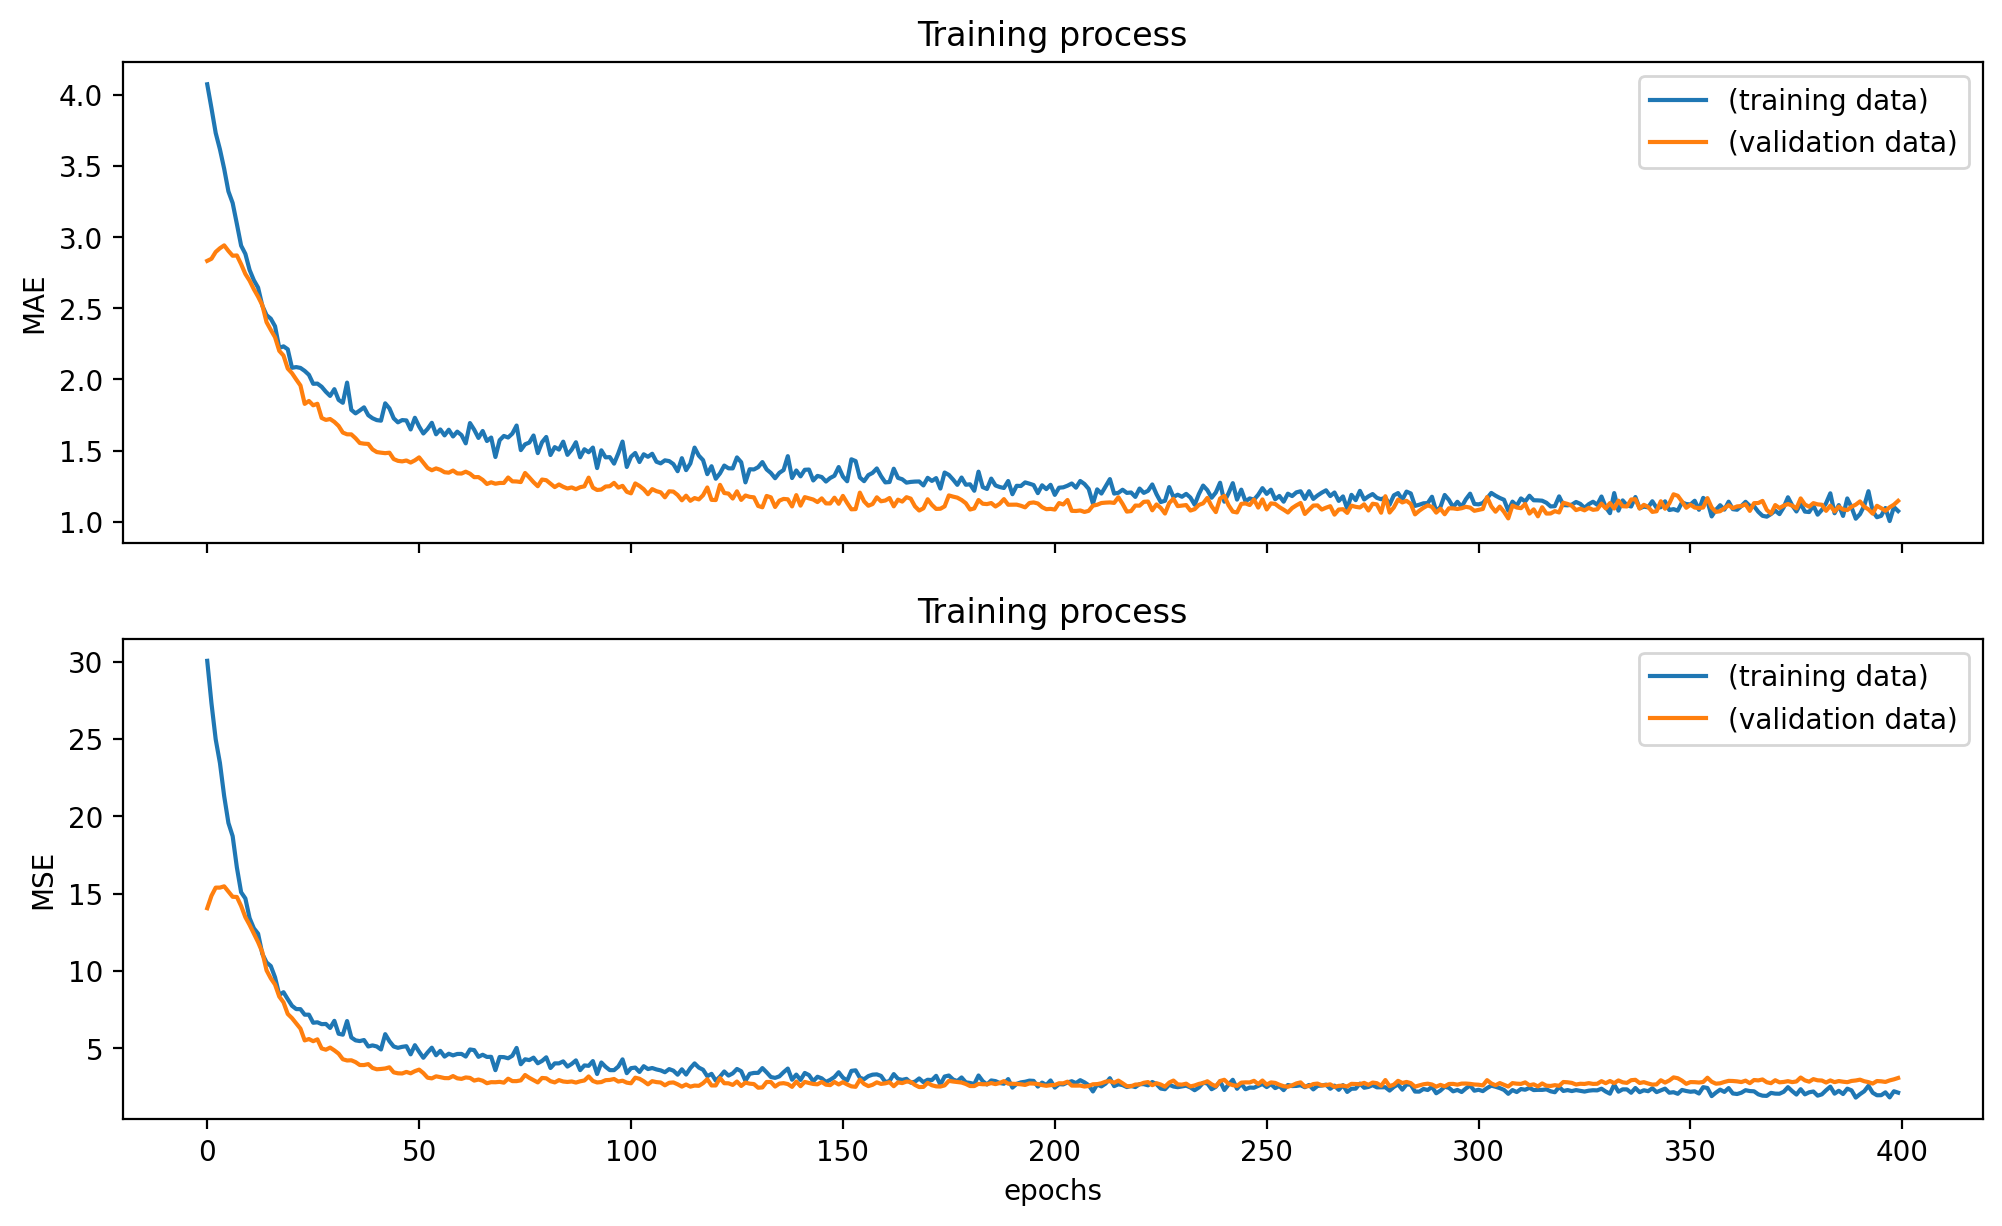

In [138]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['mae'], "-", label='(training data)')
ax1.plot(history.history['val_mae'], "-", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("MAE")
#ax1.set_ylim((0.1, 2))
ax1.legend()

ax2.plot(history.history['mse'], "-", label='(training data)')
ax2.plot(history.history['val_mse'], "-", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("MSE")
ax2.set_xlabel("epochs")
ax2.legend()

Text(0, 0.5, 'true values')

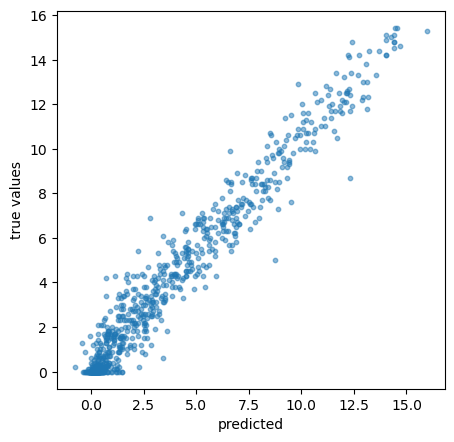

In [139]:
y_predicted = model.predict(X_train)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_train, s=10, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")

Text(0, 0.5, 'true values')

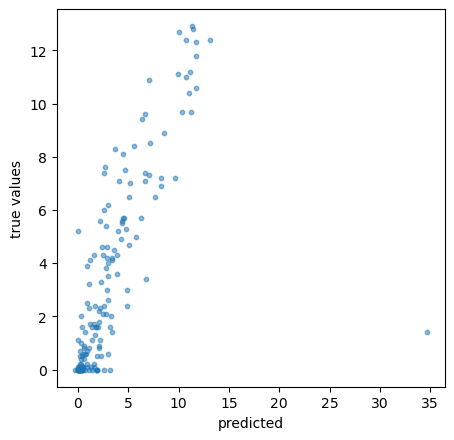

In [140]:
y_predicted = model.predict(X_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_test, s=10, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")

# Consider problem of unbalanced data

<AxesSubplot:>

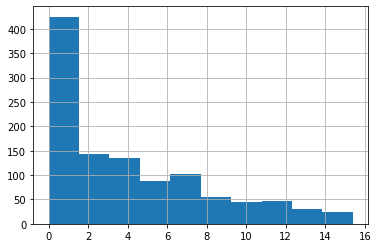

In [141]:
X_data_removed["DUSSELDORF_sunshine"].hist()

In [13]:
from imblearn.over_sampling import SMOTE, ADASYN

In [16]:
Y_train[:30]

array([ 2.9,  3.5,  0. , 10.7,  0. ,  1.7,  6.2,  7.6,  0.7,  1.8,  3.6,
        7.2, 10.7,  2.5, 11. ,  4.5,  0. ,  0. , 12.4,  0. ,  0.5,  4.2,
        0. ,  0. ,  0. ,  1.5,  1.6,  3.3,  9.4, 12.6])

In [17]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_train, Y_train.astype(int))


In [19]:
X_resampled.shape, X_train.shape

((3840, 144), (767, 144))

(array([286., 101.,  95.,  63.,  73.,  41.,  36.,  34.,  19.,  19.]),
 array([ 0.  ,  1.54,  3.08,  4.62,  6.16,  7.7 ,  9.24, 10.78, 12.32,
        13.86, 15.4 ]),
 <BarContainer object of 10 artists>)

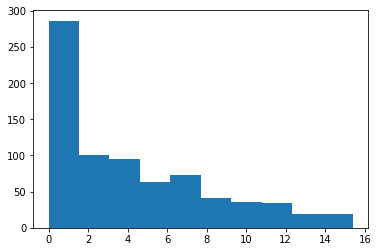

In [22]:
plt.hist(Y_train)

(array([480., 240., 480., 240., 480., 240., 480., 240., 480., 480.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

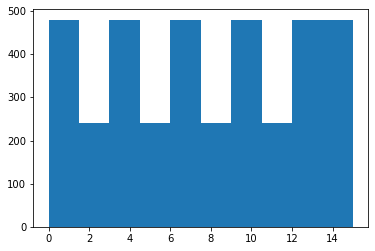

In [21]:
plt.hist(y_resampled)

In [25]:
from tensorflow.keras.layers import Dropout

n_features = X_data.shape[1]
n_predictions = 1

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = BatchNormalization()(layers_input)
    layers_dense = Dense(100, 'relu')(layers_input)
    layers_dense = Dropout(rate=0.25)(layers_dense)
    layers_dense = BatchNormalization()(layers_dense)
    layers_dense = Dense(50, 'relu')(layers_dense)
    layers_dense = Dropout(rate=0.25)(layers_dense)

    # Output layer
    layers_output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output)

model = create_nn(n_features, n_predictions)
model.compile(loss='mse', optimizer=Adam(1e-4), metrics=['mse', 'mae'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 144)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51  

In [26]:
history = model.fit(X_resampled, y_resampled,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
120/120 - 1s - loss: 61.8193 - mse: 61.8193 - mae: 6.6765 - val_loss: 19.9726 - val_mse: 19.9726 - val_mae: 3.3152
Epoch 2/200
120/120 - 0s - loss: 39.7557 - mse: 39.7557 - mae: 5.3937 - val_loss: 15.3496 - val_mse: 15.3496 - val_mae: 2.9203
Epoch 3/200
120/120 - 0s - loss: 23.8284 - mse: 23.8284 - mae: 4.0758 - val_loss: 11.3922 - val_mse: 11.3922 - val_mae: 2.4984
Epoch 4/200
120/120 - 0s - loss: 15.7931 - mse: 15.7931 - mae: 3.2453 - val_loss: 9.3195 - val_mse: 9.3195 - val_mae: 2.3023
Epoch 5/200
120/120 - 0s - loss: 12.2814 - mse: 12.2814 - mae: 2.8169 - val_loss: 8.0963 - val_mse: 8.0963 - val_mae: 2.2004
Epoch 6/200
120/120 - 0s - loss: 10.3653 - mse: 10.3653 - mae: 2.5828 - val_loss: 7.1041 - val_mse: 7.1041 - val_mae: 2.1209
Epoch 7/200
120/120 - 0s - loss: 9.3030 - mse: 9.3030 - mae: 2.4436 - val_loss: 6.0885 - val_mse: 6.0885 - val_mae: 1.9922
Epoch 8/200
120/120 - 0s - loss: 7.6239 - mse: 7.6239 - mae: 2.1971 - val_loss: 5.2608 - val_mse: 5.2608 - val_mae: 1.856

Epoch 67/200
120/120 - 0s - loss: 2.8831 - mse: 2.8831 - mae: 1.3268 - val_loss: 3.7965 - val_mse: 3.7965 - val_mae: 1.3527
Epoch 68/200
120/120 - 0s - loss: 3.1555 - mse: 3.1555 - mae: 1.3876 - val_loss: 4.4167 - val_mse: 4.4167 - val_mae: 1.3810
Epoch 69/200
120/120 - 0s - loss: 3.0430 - mse: 3.0430 - mae: 1.3667 - val_loss: 3.7065 - val_mse: 3.7065 - val_mae: 1.3742
Epoch 70/200
120/120 - 0s - loss: 3.0468 - mse: 3.0468 - mae: 1.3646 - val_loss: 3.7717 - val_mse: 3.7717 - val_mae: 1.3440
Epoch 71/200
120/120 - 0s - loss: 3.0171 - mse: 3.0171 - mae: 1.3521 - val_loss: 4.2553 - val_mse: 4.2553 - val_mae: 1.3680
Epoch 72/200
120/120 - 0s - loss: 2.9728 - mse: 2.9728 - mae: 1.3398 - val_loss: 3.6991 - val_mse: 3.6991 - val_mae: 1.3278
Epoch 73/200
120/120 - 0s - loss: 2.9140 - mse: 2.9140 - mae: 1.3338 - val_loss: 3.8791 - val_mse: 3.8791 - val_mae: 1.3812
Epoch 74/200
120/120 - 0s - loss: 2.7819 - mse: 2.7819 - mae: 1.2985 - val_loss: 3.6682 - val_mse: 3.6682 - val_mae: 1.3195
Epoch 75

Epoch 133/200
120/120 - 0s - loss: 2.4162 - mse: 2.4162 - mae: 1.2092 - val_loss: 3.4319 - val_mse: 3.4319 - val_mae: 1.2905
Epoch 134/200
120/120 - 0s - loss: 2.3657 - mse: 2.3657 - mae: 1.1979 - val_loss: 3.4027 - val_mse: 3.4027 - val_mae: 1.2863
Epoch 135/200
120/120 - 0s - loss: 2.3595 - mse: 2.3595 - mae: 1.2024 - val_loss: 3.2589 - val_mse: 3.2589 - val_mae: 1.2416
Epoch 136/200
120/120 - 0s - loss: 2.3114 - mse: 2.3114 - mae: 1.1846 - val_loss: 3.2518 - val_mse: 3.2518 - val_mae: 1.2333
Epoch 137/200
120/120 - 0s - loss: 2.4593 - mse: 2.4593 - mae: 1.2156 - val_loss: 3.4224 - val_mse: 3.4224 - val_mae: 1.2979
Epoch 138/200
120/120 - 0s - loss: 2.3641 - mse: 2.3641 - mae: 1.1955 - val_loss: 3.3471 - val_mse: 3.3471 - val_mae: 1.2650
Epoch 139/200
120/120 - 0s - loss: 2.2832 - mse: 2.2832 - mae: 1.1621 - val_loss: 3.2525 - val_mse: 3.2525 - val_mae: 1.2586
Epoch 140/200
120/120 - 0s - loss: 2.2761 - mse: 2.2761 - mae: 1.1712 - val_loss: 3.2031 - val_mse: 3.2031 - val_mae: 1.2344


Epoch 199/200
120/120 - 0s - loss: 2.0984 - mse: 2.0984 - mae: 1.1298 - val_loss: 3.3234 - val_mse: 3.3234 - val_mae: 1.2115
Epoch 200/200
120/120 - 0s - loss: 2.2349 - mse: 2.2349 - mae: 1.1555 - val_loss: 3.3712 - val_mse: 3.3712 - val_mae: 1.2337


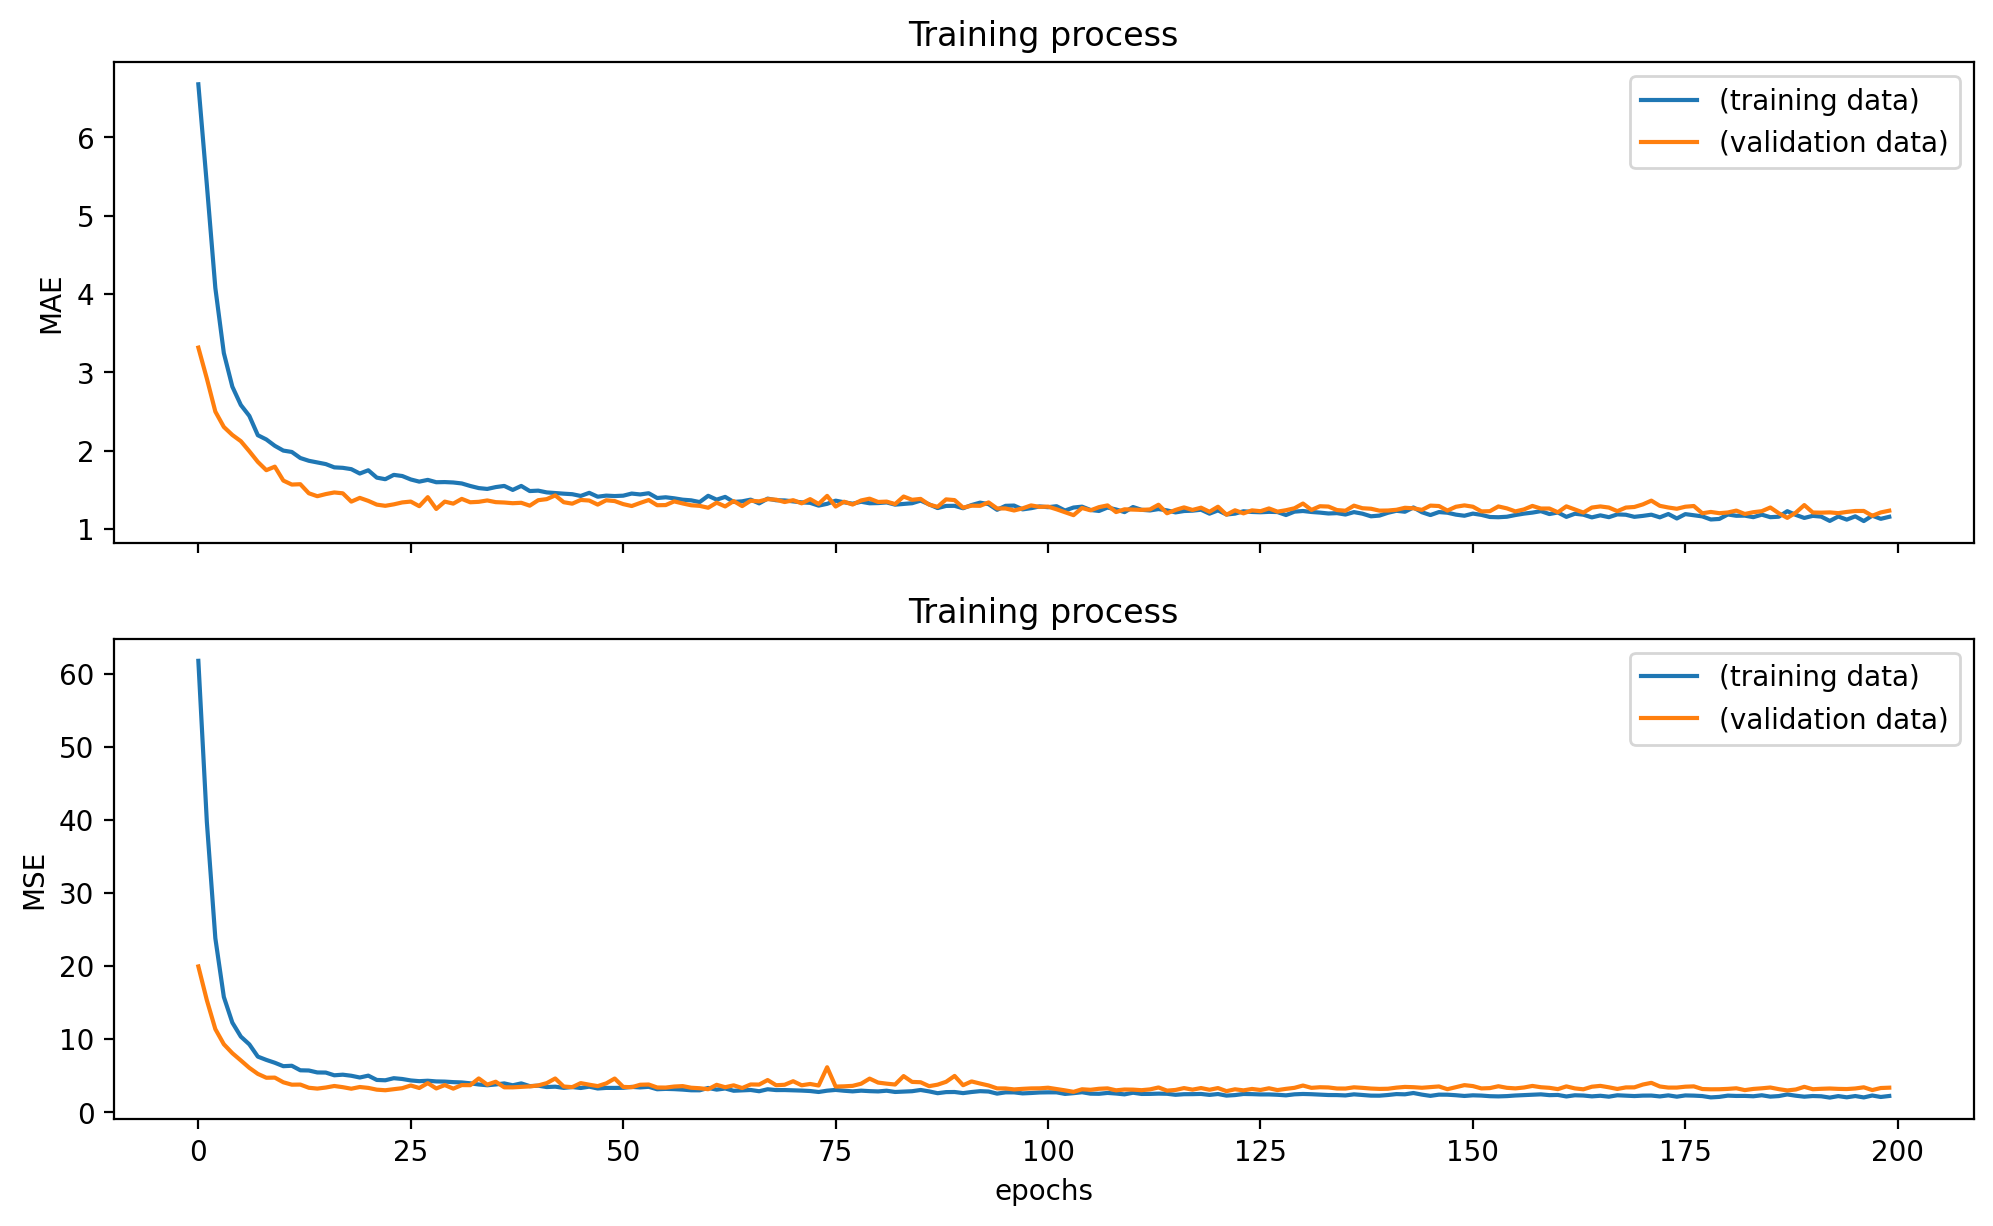

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['mae'], "-", label='(training data)')
ax1.plot(history.history['val_mae'], "-", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("MAE")
#ax1.set_ylim((0.1, 2))
ax1.legend()

ax2.plot(history.history['mse'], "-", label='(training data)')
ax2.plot(history.history['val_mse'], "-", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("MSE")
ax2.set_xlabel("epochs")
ax2.legend()

Text(0, 0.5, 'true values')

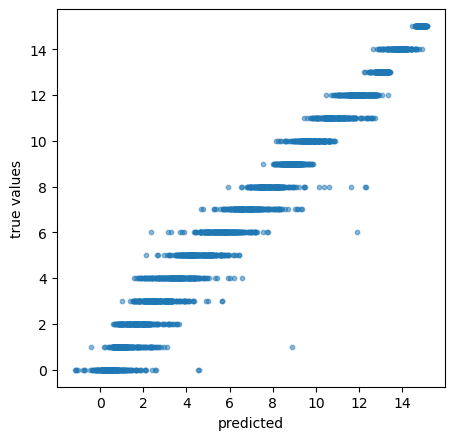

In [30]:
y_predicted = model.predict(X_resampled)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, y_resampled, s=10, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")

Text(0, 0.5, 'true values')

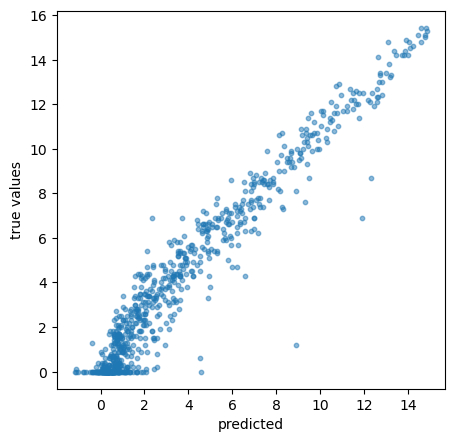

In [28]:
y_predicted = model.predict(X_train)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_train, s=10, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")

Text(0, 0.5, 'true values')

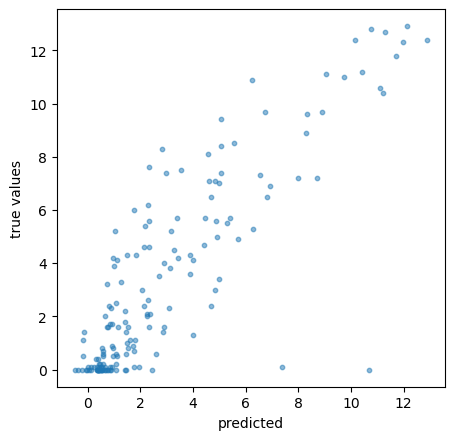

In [29]:
y_predicted = model.predict(X_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_predicted, Y_test, s=10, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")

In [ ]:
>>> print(sorted(Counter(y_resampled).items()))
[(0, 4674), (1, 4674), (2, 4674)]
>>> clf_smote = LinearSVC().fit(X_resampled, y_resampled)
>>> X_resampled, y_resampled = ADASYN().fit_resample(X, y)
>>> print(sorted(Counter(y_resampled).items()))
[(0, 4673), (1, 4662), (2, 4674)]
>>> clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

In [72]:
from tensorflow.keras.optimizers import Adam


n_features = X_data.shape[1]
n_predictions = 1

# Input layer
layers_input = Input(shape=(n_features,), name='input')

# Dense layers
layers_dense = BatchNormalization()(layers_input)
layers_dense = Dense(100, 'relu')(layers_dense)
layers_dense = BatchNormalization()(layers_dense)
layers_dense = Dense(50, 'relu')(layers_dense)

# Output layer
layers_output = Dense(n_predictions)(layers_dense)

# Defining the model and compiling it
model = Model(inputs=layers_input, outputs=layers_output)
model.compile(loss='mae', optimizer=Adam(lr=1e-3), metrics=['mse', 'mae'])

model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 144)]             0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 144)               576       
_________________________________________________________________
dense_53 (Dense)             (None, 100)               14500     
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dense_54 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 51        
Total params: 20,577
Trainable params: 20,089
Non-trainable params: 488
____________________________________________________

In [73]:
history = model.fit(X_train, Y_train,
                    batch_size = 50,
                    epochs = 200,
                    validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/200
16/16 - 1s - loss: 0.6334 - mse: 0.7276 - mae: 0.6334 - val_loss: 1.7523 - val_mse: 3.8652 - val_mae: 1.7523
Epoch 2/200
16/16 - 0s - loss: 0.3956 - mse: 0.2690 - mae: 0.3956 - val_loss: 1.2346 - val_mse: 2.0190 - val_mae: 1.2346
Epoch 3/200
16/16 - 0s - loss: 0.3353 - mse: 0.2029 - mae: 0.3353 - val_loss: 0.9240 - val_mse: 1.1707 - val_mae: 0.9240
Epoch 4/200
16/16 - 0s - loss: 0.3018 - mse: 0.1631 - mae: 0.3018 - val_loss: 0.8598 - val_mse: 1.1316 - val_mae: 0.8598
Epoch 5/200
16/16 - 0s - loss: 0.2703 - mse: 0.1401 - mae: 0.2703 - val_loss: 0.5638 - val_mse: 0.4802 - val_mae: 0.5638
Epoch 6/200
16/16 - 0s - loss: 0.2437 - mse: 0.1113 - mae: 0.2437 - val_loss: 0.5329 - val_mse: 0.4376 - val_mae: 0.5329
Epoch 7/200
16/16 - 0s - loss: 0.2349 - mse: 0.1087 - mae: 0.2349 - val_loss: 0.5229 - val_mse: 0.4119 - val_mae: 0.5229
Epoch 8/200
16/16 - 0s - loss: 0.2224 - mse: 0.0917 - mae: 0.2224 - val_loss: 0.4122 - val_mse: 0.2680 - val_mae: 0.4122
Epoch 9/200
16/16 - 0s - loss: 0

Epoch 69/200
16/16 - 0s - loss: 0.0963 - mse: 0.0200 - mae: 0.0963 - val_loss: 0.2249 - val_mse: 0.1231 - val_mae: 0.2249
Epoch 70/200
16/16 - 0s - loss: 0.1044 - mse: 0.0219 - mae: 0.1044 - val_loss: 0.2356 - val_mse: 0.1213 - val_mae: 0.2356
Epoch 71/200
16/16 - 0s - loss: 0.1036 - mse: 0.0225 - mae: 0.1036 - val_loss: 0.2144 - val_mse: 0.1153 - val_mae: 0.2144
Epoch 72/200
16/16 - 0s - loss: 0.0940 - mse: 0.0193 - mae: 0.0940 - val_loss: 0.2174 - val_mse: 0.1149 - val_mae: 0.2174
Epoch 73/200
16/16 - 0s - loss: 0.1055 - mse: 0.0246 - mae: 0.1055 - val_loss: 0.2126 - val_mse: 0.1106 - val_mae: 0.2126
Epoch 74/200
16/16 - 0s - loss: 0.0954 - mse: 0.0215 - mae: 0.0954 - val_loss: 0.2192 - val_mse: 0.1188 - val_mae: 0.2192
Epoch 75/200
16/16 - 0s - loss: 0.1004 - mse: 0.0212 - mae: 0.1004 - val_loss: 0.2127 - val_mse: 0.1179 - val_mae: 0.2127
Epoch 76/200
16/16 - 0s - loss: 0.1001 - mse: 0.0215 - mae: 0.1001 - val_loss: 0.2146 - val_mse: 0.1174 - val_mae: 0.2146
Epoch 77/200
16/16 - 0s 

Epoch 136/200
16/16 - 0s - loss: 0.0789 - mse: 0.0132 - mae: 0.0789 - val_loss: 0.1957 - val_mse: 0.0974 - val_mae: 0.1957
Epoch 137/200
16/16 - 0s - loss: 0.0773 - mse: 0.0135 - mae: 0.0773 - val_loss: 0.1917 - val_mse: 0.0932 - val_mae: 0.1917
Epoch 138/200
16/16 - 0s - loss: 0.0796 - mse: 0.0126 - mae: 0.0796 - val_loss: 0.1924 - val_mse: 0.0923 - val_mae: 0.1924
Epoch 139/200
16/16 - 0s - loss: 0.0717 - mse: 0.0114 - mae: 0.0717 - val_loss: 0.1937 - val_mse: 0.0939 - val_mae: 0.1937
Epoch 140/200
16/16 - 0s - loss: 0.0700 - mse: 0.0110 - mae: 0.0700 - val_loss: 0.1997 - val_mse: 0.1031 - val_mae: 0.1997
Epoch 141/200
16/16 - 0s - loss: 0.0805 - mse: 0.0147 - mae: 0.0805 - val_loss: 0.2070 - val_mse: 0.1046 - val_mae: 0.2070
Epoch 142/200
16/16 - 0s - loss: 0.0758 - mse: 0.0131 - mae: 0.0758 - val_loss: 0.2035 - val_mse: 0.1060 - val_mae: 0.2035
Epoch 143/200
16/16 - 0s - loss: 0.0754 - mse: 0.0122 - mae: 0.0754 - val_loss: 0.1972 - val_mse: 0.0960 - val_mae: 0.1972
Epoch 144/200
16

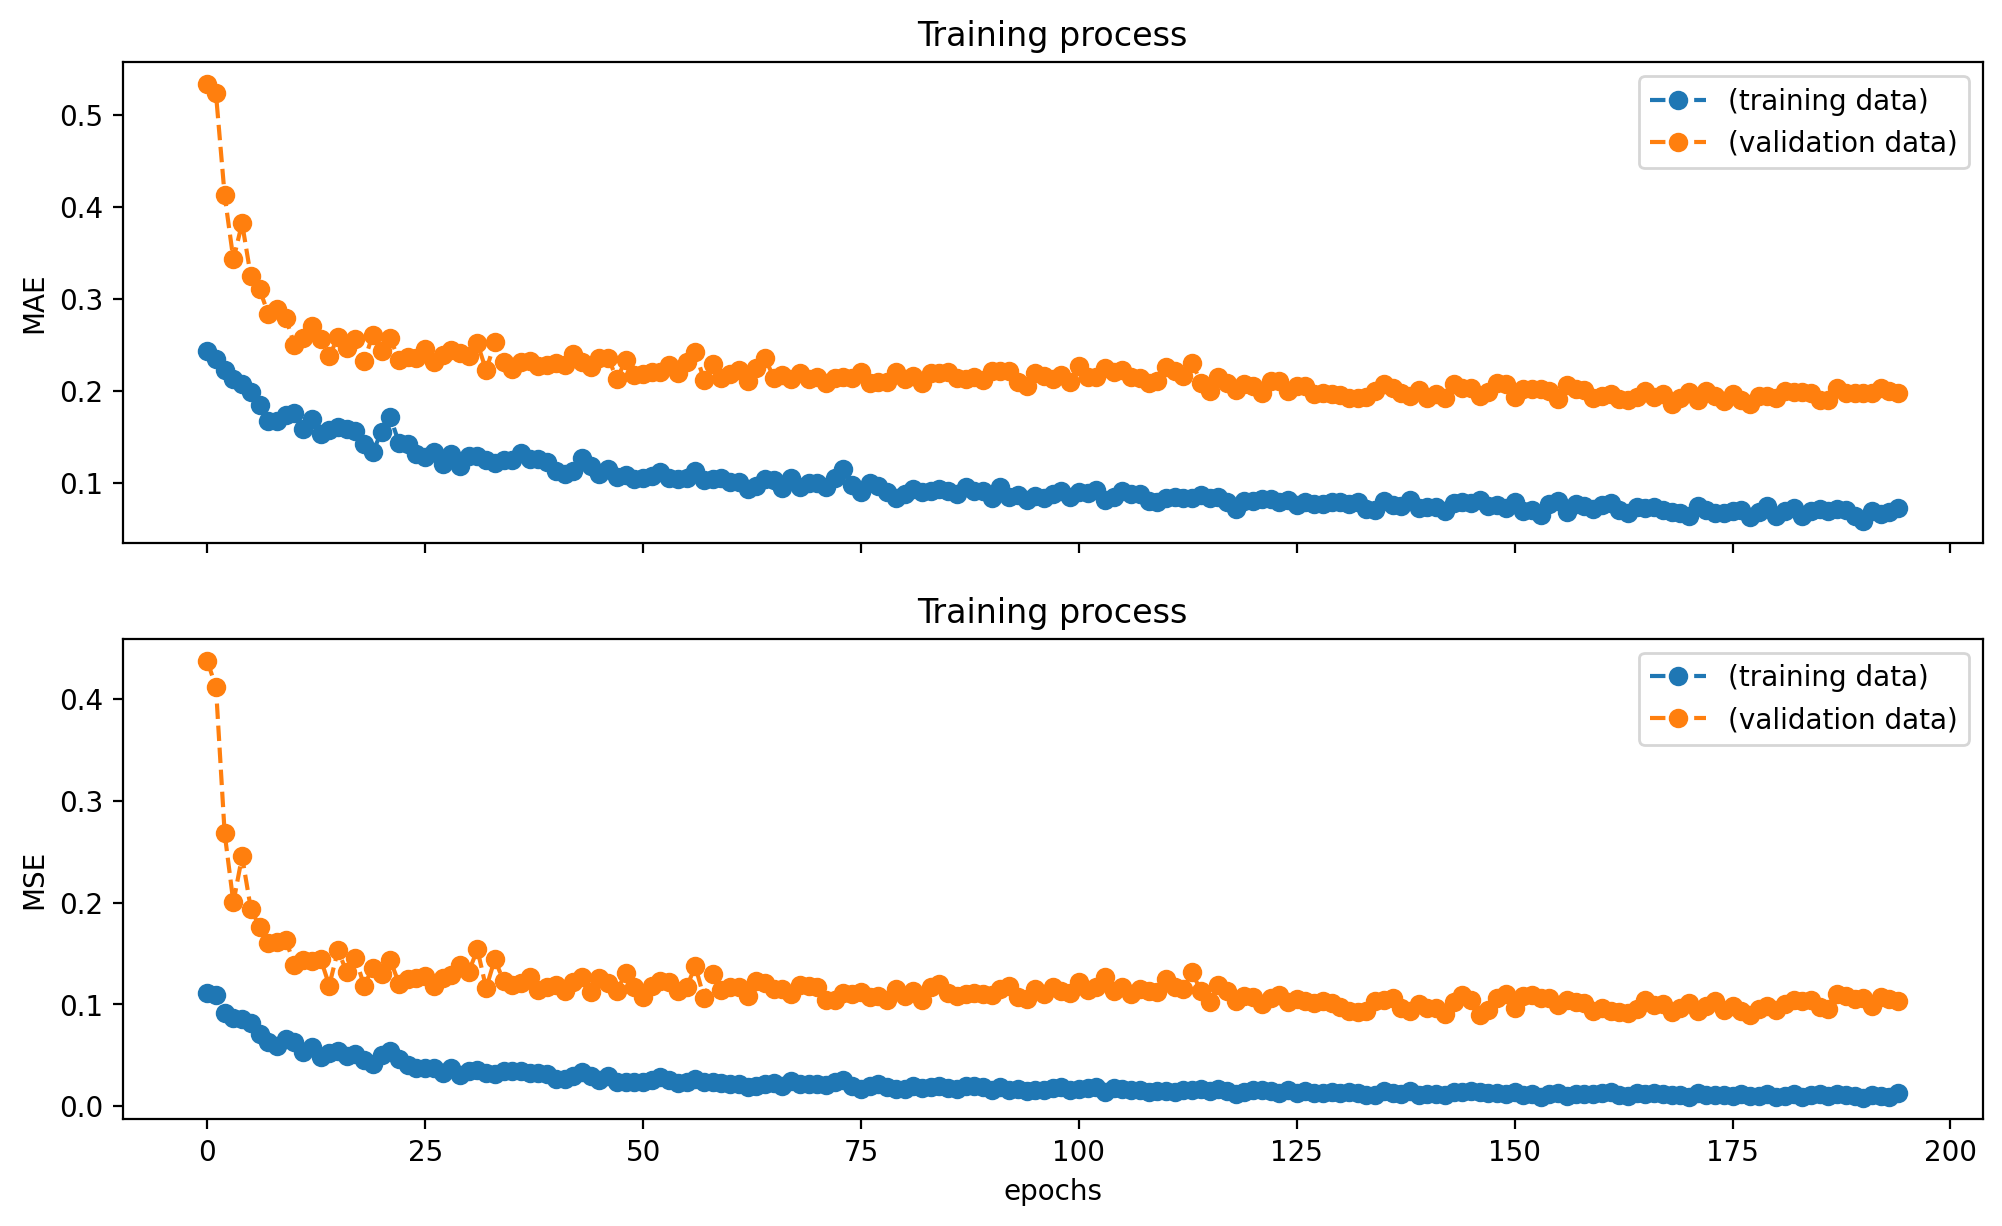

In [74]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7), dpi=200)

ax1.plot(history.history['mae'][5:], "o--", label='(training data)')
ax1.plot(history.history['val_mae'][5:], "o--", label='(validation data)')
ax1.set_title('Training process')
ax1.set_ylabel("MAE")
ax1.legend()

ax2.plot(history.history['mse'][5:], "o--", label='(training data)')
ax2.plot(history.history['val_mse'][5:], "o--", label='(validation data)')
ax2.set_title('Training process')
ax2.set_ylabel("MSE")
ax2.set_xlabel("epochs")
ax2.legend()